In [1]:
import os
import gzip
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.io
from anndata import AnnData
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sc.settings.set_figure_params(dpi=100)
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
%load_ext rpy2.ipython
import harmonypy as hm


In [4]:
replace = []
delete = []
barcodes_final= []
#REPLACE
samples = ['scATAC_islet4807_unt_4000','scATAC_islet7453_unt_500','scATAC_islet7453_cyt', '1000cytokine','1000untreated','A0019','C0025','C0026']
for sample in samples:
    #ex = pd.read_csv('/nfs/lab/elisha/2020nPOD/gaulton/final/{}excluded_barcodes.csv'.format(sample))
    #exes = ex['Excluded Barcode']
    #exes2 = exes.tolist()
    #READ IN CLEAN.TXT FOR EACH INDIVIDUAL SAMPLE
    frip=pd.read_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/{}_clean.txt'.format(sample), sep='\t',index_col=0)
    frips= frip.index
    frips2=frips.tolist()
    #REPLACE
    wd = '/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/{}'.format(sample)
    sp = scipy.io.mmread(os.path.join(wd, '{}.mtx.gz'.format(sample))).tocsr()
    regions = open(os.path.join(wd, '{}.regions'.format(sample))).read().splitlines()
    barcodes = open(os.path.join(wd, '{}.barcodes'.format(sample))).read().splitlines()
    
    replace.append(barcodes.copy())
    
    delete1 = []
    count = 0
    print(sample)
    print(len(barcodes))
    while count < 5:
        #for temp in barcodes:
        #    curr = temp
        #    temp = temp + '-1'
        #    temp = temp[7:]
        #    if temp in exes2:
        #        delete1.append(curr)
        #        barcodes.remove(curr)
        for temp in barcodes:
            curr = temp
            if temp not in frips2:
                delete1.append(curr)
                barcodes.remove(curr)
        print(len(barcodes))
        count += 1
    #SAVE DELETE.TXT TO SAVE TIME
    with open('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/{}_delete.txt'.format(sample), 'w') as f:
        for item in delete1:
            f.write("%s\n" % item) 
    delete.append(delete1)
    barcodes_final.append(barcodes)

scATAC_islet4807_unt_4000
1910
1881
1881
1881
1881
1881
scATAC_islet7453_unt_500
1314
1179
1169
1169
1169
1169
scATAC_islet7453_cyt
2168
1802
1733
1732
1732
1732
1000cytokine
3512
3161
3062
3047
3046
3046
1000untreated
2413
2099
2032
2022
2021
2021
A0019
19971
11655
7747
6137
5705
5667
C0025
8531
7370
7157
7143
7143
7143
C0026
19501
11590
7908
6514
6216
6194


In [5]:
#READ IN DELETE.TXT

#delete = []
#replace = []
#samples = ['MM_339','MM_340','MM_341','MM_342', 'MM_343', 'MM_344', 'MM_345','MM_365','MM_366','MM_367', 'MM_371', 'MM_383', 'MM_384','MM_385','MM_386','MM_387','MM_388','MM_390', 'MM_391','MM_392','MM_394','MM_395','MM_396']
#for sample in samples:
#    delete1 = []
#    print(sample)
#    wd = '/nfs/lab/elisha/2020nPOD/gaulton/combine/{}'.format(sample)
#    with open('/nfs/lab/elisha/2020nPOD/gaulton/combine/{}_delete.txt'.format(sample)) as f:
#        delete1 = f.read().splitlines()
#    barcodes = open(os.path.join(wd, '{}.barcodes'.format(sample))).read().splitlines()
#    delete.append(delete1)
#    replace.append(barcodes.copy())
    

In [6]:
geneNames = {}
geneNames['11:2182049-2182779'] = 'INS-IGF2'
geneNames['2:163007699-163009094'] = 'GCG'
geneNames['3:187387788-187388467'] = 'SST'
geneNames['17:42019756-42019956'] = 'PPY'
geneNames['7:117118937-117120363'] = 'CFTR'
geneNames['2:79347439-79347706'] = 'REG1A'
geneNames['16:66400424-66400624']  = 'CDH5'
geneNames['12:9913373-9913599'] = 'CD69'
geneNames['5:149535143-149535733'] = 'PDGFRB'
geneNames['13:28493855-28495655'] = 'PDX1'
geneNames['X:25033611-25034730'] = 'ARX'
geneNames['1:22970000-22975000'] = 'C1QC'

In [7]:
adatas = {}
#REPLACE
samples = ['scATAC_islet4807_unt_4000','scATAC_islet7453_unt_500','scATAC_islet7453_cyt', '1000cytokine','1000untreated','A0019','C0025','C0026']

#promoters = pd.read_csv('/nfs/lab/elisha/scripts/gencode.v19.5kb_promoter_names.txt', sep='\t', header=None, index_col=0, names=['prom'])
#promoter_names = promoters['prom'].to_dict()

count_sampleIndex = 0

for sample in samples:
    #REPLACE
    wd = '/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/{}'.format(sample)
    sp = scipy.io.mmread(os.path.join(wd, '{}.mtx.gz'.format(sample))).tocsr()
    regions = open(os.path.join(wd, '{}.regions'.format(sample))).read().splitlines()
    #barcodes = open(os.path.join(wd, '{}.barcodes'.format(sample))).read().splitlines()
    #adatas[sample] = AnnData(sp, {'obs_names':barcodes}, {'var_names':regions})
    adatas[sample] = AnnData(sp, {'obs_names':replace[count_sampleIndex]}, {'var_names':regions})
    adatas[sample] = adatas[sample][(~adatas[sample].obs.index.isin(delete[count_sampleIndex])),:].copy()
    adatas[sample].var.index = [geneNames[b] if b in geneNames else b for b in adatas[sample].var.index]
    adatas[sample].var_names_make_unique(join='.')
    print(sample)
    print("Sample Done")
    print(len(replace[count_sampleIndex]))
    print(len(delete[count_sampleIndex]))
    count_sampleIndex += 1

#REPLACE
adata_merged = AnnData.concatenate(adatas['scATAC_islet4807_unt_4000'],adatas['scATAC_islet7453_unt_500'],adatas['scATAC_islet7453_cyt'],
                                   adatas['1000cytokine'],adatas['1000untreated'],adatas['A0019'],adatas['C0025'],adatas['C0026'],
                                   batch_key='experiment', index_unique=None)

#REPLACE WITH WHAT WORKS FOR YOUR CODE SO YOU GET THE WHOLE SAMPLE NAME
#adata_merged.obs['experiment'] = [i.split('_')[2] for i in adata_merged.obs.index]
adata_merged.obs['experiment'] = [i[:-17] for i in adata_merged.obs.index]

print(adata_merged)


scATAC_islet4807_unt_4000
Sample Done
1910
29
scATAC_islet7453_unt_500
Sample Done
1314
145
scATAC_islet7453_cyt
Sample Done
2168
436
1000cytokine
Sample Done
3512
466
1000untreated
Sample Done
2413
392
A0019
Sample Done
19971
14304
C0025
Sample Done
8531
1388
C0026
Sample Done
19501
13307
AnnData object with n_obs × n_vars = 28853 × 206802
    obs: 'experiment'


In [8]:
#WRITE H5AD TO SAVE TIME


adata_merged.write_h5ad('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/adata_merged_1210.h5ad')
#adata_merged = sc.read_h5ad('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/adata_merged_1112.h5ad')


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'experiment' as categorical


In [9]:
#MERGE QC METRICS

print("start combining qc_metric")
df1 = pd.read_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/scATAC_islet4807_unt_4000/scATAC_islet4807_unt_4000.qc_metrics.txt', sep='\t', header=0, index_col=0)
df2 = pd.read_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/scATAC_islet7453_unt_500/scATAC_islet7453_unt_500.qc_metrics.txt', sep='\t', header=0, index_col=0)
df3 = pd.read_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/scATAC_islet7453_cyt/scATAC_islet7453_cyt.qc_metrics.txt', sep='\t', header=0, index_col=0)
df4 = pd.read_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/1000cytokine/1000cytokine.qc_metrics.txt', sep='\t', header=0, index_col=0)
df5 = pd.read_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/1000untreated/1000untreated.qc_metrics.txt', sep='\t', header=0, index_col=0)
df6 = pd.read_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/A0019/A0019.qc_metrics.txt', sep='\t', header=0, index_col=0)
df7 = pd.read_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/C0025/C0025.qc_metrics.txt', sep='\t', header=0, index_col=0)
df8 = pd.read_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/C0026/C0026.qc_metrics.txt', sep='\t', header=0, index_col=0)

qc_metrics = pd.concat([df1, df2, df3,df4,df5,df6,df7,df8], axis=0)
qc_metrics.to_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/merged_qc_1210.txt', sep='\t')

qc_metrics = qc_metrics.loc[adata_merged.obs.index]
print("finish combining")

start combining qc_metric
finish combining


In [10]:
#GET HVGS

adata_merged.obs = adata_merged.obs.join(qc_metrics, how='inner')
adata_merged.raw = adata_merged.copy()

sc.pp.normalize_per_cell(adata_merged, counts_per_cell_after=1e4)
sc.pp.log1p(adata_merged)

sc.pp.highly_variable_genes(adata_merged, min_mean=0.005, max_mean=6, min_disp=0.1)
adata_merged.obs['row_number'] = np.arange(len(adata_merged.obs))
#samples = ['MM_339','MM_340','MM_341','MM_342', 'MM_343', 'MM_344', 'MM_345','MM_365','MM_366','MM_367', 'MM_371', 'MM_383', 'MM_384','MM_385','MM_386','MM_387','MM_388','MM_390', 'MM_391','MM_392','MM_394','MM_395','MM_396']

for sample in samples:
    adata_merged.var[sample] = (adata_merged.raw.X > 0)[adata_merged.obs.loc[adata_merged.obs['experiment']==sample, 'row_number'].values,:].sum(axis=0).A1
adata_merged = adata_merged[:, (adata_merged.var['highly_variable']) & ((adata_merged.var[samples]>0).sum(axis=1)==len(samples))]
adata_merged.raw.var['highly_variable'] = adata_merged.raw.var.index.isin(adata_merged.var.index)
adata_merged.raw.var['row_number'] = np.arange(len(adata_merged.raw.var))
subset = adata_merged.raw.var.loc[adata_merged.raw.var['highly_variable'], 'row_number'].tolist()
adata_merged.obs['usable_counts'] = np.sum(adata_merged.raw.X[:, subset], axis=1).A1
adata_merged.obs['log_usable_counts'] = np.log(adata_merged.obs['usable_counts'])


normalizing by total count per cell


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:04): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
extracting highly variable genes
    finished (0:00:11)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Trying to set attribute `.obs` of view, copying.


In [11]:
hvgs = adata_merged.var.index 
print(len(hvgs))
#Replace
with open('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/merged_hvgs_1210.txt', 'w') as f:
    for item in hvgs:
        f.write("%s\n" % item) 

62787


In [12]:
#SAVE PROGRESS
adata_merged.write_h5ad('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/adata_merged_hvg_1210.h5ad')


In [ ]:
#OLD STUFF DON'T TOUCH

#### print(len(frame), len(adata_merged))
#adata_merged.obs = adata_merged.obs.join(qc_metrics, how='inner')
##
##whitelist = open(os.path.join(wd, 'islet_pancreas.whitelist')).read().splitlines()
##blacklist = open(os.path.join(wd, 'islet_pancreas.blacklist')).read().splitlines()
##adata_merged = adata_merged[(adata_merged.obs.index.isin(whitelist)) & (~adata_merged.obs.index.isin(blacklist)),:].copy()
#
#adata_merged_orig = adata_merged.copy()
#adata_merged_raw = sc.pp.log1p(adata_merged, copy=True)
#
#sc.pp.normalize_per_cell(adata_merged, counts_per_cell_after=1e4)
#adata_merged_filter = sc.pp.filter_genes_dispersion(adata_merged.X, flavor='seurat', n_bins=100, min_mean=0.01, min_disp=.25)#, min_mean=.0075)
#
#hvgs = adata_merged.var.loc[adata_merged_filter.gene_subset].index.tolist()
##for sample in samples:
##    adata_merged.var[sample] = (adata_merged_raw.X > 0)[(adata_merged.obs['experiment']==sample).values,:].sum(axis=0).A1
#hvgs_check = adata_merged.var.loc[adata_merged.var.index.isin(hvgs)]
#hvgs = hvgs_check.loc[(hvgs_check>0).sum(axis=1)==len(hvgs_check.columns)].index.tolist()
#adata_merged.var = adata_merged.var.drop(samples, axis=1)
#len(hvgs)

In [13]:
#not yet updated
adatas = {}
#REPLACE
samples = ['scATAC_islet4807_unt_4000','scATAC_islet7453_unt_500','scATAC_islet7453_cyt', '1000cytokine','1000untreated','A0019','C0025','C0026']

#promoters = pd.read_csv('/nfs/lab/elisha/scripts/gencode.v19.5kb_promoter_names.txt', sep='\t', header=None, index_col=0, names=['prom'])
#promoter_names = promoters['prom'].to_dict()

count_sampleIndex = 0
#REPLACE
hvgs = open('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/merged_hvgs_1210.txt').read().splitlines()

for sample in samples:
    print(sample)
    print(count_sampleIndex)
    print(len(replace[count_sampleIndex]))
    print(len(delete[count_sampleIndex]))
    #REPLACE
    wd = '/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/{}'.format(sample)
    sp = scipy.io.mmread(os.path.join(wd, '{}.mtx.gz'.format(sample))).tocsr()
    regions = open(os.path.join(wd, '{}.regions'.format(sample))).read().splitlines()
    #barcodes = open(os.path.join(wd, '{}.barcodes'.format(sample))).read().splitlines()
    #adatas[sample] = AnnData(sp, {'obs_names':barcodes}, {'var_names':regions})
    adatas[sample] = AnnData(sp, {'obs_names':replace[count_sampleIndex]}, {'var_names':regions})
    adatas[sample] = adatas[sample][(~adatas[sample].obs.index.isin(delete[count_sampleIndex])),:].copy()
    adatas[sample].var.index = [geneNames[b] if b in geneNames else b for b in adatas[sample].var.index]
    adatas[sample].var_names_make_unique(join='.')
    
    adatas[sample].obs = adatas[sample].obs.join(qc_metrics, how='inner')
    
    #sc.pp.filter_genes(adatas[sample], min_counts=1)
    
    #REPLACE CHANGE HERE
    adatas[sample].obs['experiment'] = [i[:-17] for i in adatas[sample].obs.index]
    #adatas[sample].obs['experiment'] = [i.split('_')[0] for i in adatas[sample].obs.index]
    adatas[sample].obs['log10_unique_usable_reads'] = np.log10(adatas[sample].obs['unique_usable_reads'])
    raw = adatas[sample].copy()
    
    sc.pp.normalize_per_cell(adatas[sample], counts_per_cell_after=1e4)
    adatas[sample] = adatas[sample][:, adatas[sample].var.index.isin(hvgs)]
    sc.pp.log1p(adatas[sample])
    adatas[sample].obs['log_usable_counts'] = np.log(raw[:, raw.var.index.isin(hvgs)].X.sum(axis=1).A1)
    sc.pp.regress_out(adatas[sample], ['log_usable_counts'])
    #REPLACE
    adatas[sample].write(os.path.join(wd, '{}.norm.1210.h5ad'.format(sample)))
    
    sc.pp.normalize_per_cell(raw, counts_per_cell_after=1e4)
    sc.pp.log1p(raw)
    #REPLACE
    raw.write(os.path.join(wd, '{}.raw.1210.h5ad'.format(sample)))
    count_sampleIndex += 1

scATAC_islet4807_unt_4000
0
1910
29
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/usr/local/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:339: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


regressing out ['log_usable_counts']
    sparse input is densified and may lead to high memory use


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'experiment' as categorical


    finished (0:04:24)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'experiment' as categorical


scATAC_islet7453_unt_500
1
1314
145
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/usr/local/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:339: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


regressing out ['log_usable_counts']
    sparse input is densified and may lead to high memory use


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'experiment' as categorical


    finished (0:04:11)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'experiment' as categorical


scATAC_islet7453_cyt
2
2168
436
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/usr/local/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:339: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


regressing out ['log_usable_counts']
    sparse input is densified and may lead to high memory use


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'experiment' as categorical


    finished (0:04:18)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'experiment' as categorical


1000cytokine
3
3512
466
normalizing by total count per cell


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/usr/local/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:339: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


regressing out ['log_usable_counts']
    sparse input is densified and may lead to high memory use


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'experiment' as categorical


    finished (0:05:46)
normalizing by total count per cell


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'experiment' as categorical


1000untreated
4
2413
392
normalizing by total count per cell


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/usr/local/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:339: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


regressing out ['log_usable_counts']
    sparse input is densified and may lead to high memory use


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'experiment' as categorical


    finished (0:04:58)
normalizing by total count per cell


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'experiment' as categorical


A0019
5
19971
14304
normalizing by total count per cell


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/usr/local/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:339: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


regressing out ['log_usable_counts']
    sparse input is densified and may lead to high memory use


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'experiment' as categorical


    finished (0:08:56)
normalizing by total count per cell


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'experiment' as categorical


C0025
6
8531
1388
normalizing by total count per cell


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/usr/local/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:339: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


regressing out ['log_usable_counts']
    sparse input is densified and may lead to high memory use


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'experiment' as categorical


    finished (0:09:08)
normalizing by total count per cell


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'experiment' as categorical


C0026
7
19501
13307
normalizing by total count per cell


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/usr/local/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:339: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


regressing out ['log_usable_counts']
    sparse input is densified and may lead to high memory use


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'experiment' as categorical


    finished (0:08:15)
normalizing by total count per cell


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'experiment' as categorical


In [15]:
#not yet updated
adatas = {}
adatas_raw = {}
#REPLACE
samples = ['scATAC_islet4807_unt_4000','scATAC_islet7453_unt_500','scATAC_islet7453_cyt', '1000cytokine','1000untreated','A0019','C0025','C0026']

for sample in samples:
    #REPLACE
    wd = '/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/{}'.format(sample)
    adatas[sample] = sc.read_h5ad(os.path.join(wd, '{}.norm.1210.h5ad'.format(sample)))
    adatas_raw[sample] = sc.read_h5ad(os.path.join(wd, '{}.raw.1210.h5ad'.format(sample)))
    
#REPLACE
adata_norm = AnnData.concatenate(adatas['scATAC_islet4807_unt_4000'],adatas['scATAC_islet7453_unt_500'],adatas['scATAC_islet7453_cyt'],
                                 adatas['1000cytokine'],adatas['1000untreated'],adatas['A0019'],adatas['C0025'],adatas['C0026'],
                                 batch_key='norm', index_unique=None)
#REPLACE
adata_norm_raw = AnnData.concatenate(adatas_raw['scATAC_islet4807_unt_4000'],adatas_raw['scATAC_islet7453_unt_500'],adatas_raw['scATAC_islet7453_cyt'],
                                     adatas_raw['1000cytokine'],adatas_raw['1000untreated'],adatas_raw['A0019'],adatas_raw['C0025'],adatas_raw['C0026'],
                                     batch_key='norm', index_unique=None)
adata_norm.raw = adata_norm_raw.copy()

import gc
del adatas,adatas_raw
gc.collect()

sc.pp.scale(adata_norm)
sc.tl.pca(adata_norm, zero_center=True, svd_solver='arpack', random_state=0)
pc = pd.DataFrame(adata_norm.obsm['X_pca'], columns=['PC{}'.format(i) for i in range(1,51)], index=adata_norm.obs.index)

metadata = adata_norm.obs[['experiment']]
metadata = metadata.loc[pc.index]

#sex = {'Donor1':'F', 'Donor2':'M', 'Donor3':'M', 'Donor4':'M', 'Donor5':'M', 'Donor6':'F',
#       'Donor7':'M', 'Donor8':'M', 'Donor9':'M', 'Donor10':'F', 'Donor11':'F', 'Donor12':'M'}
#metadata['experiment'] = [i.split('_')[0] for i in metadata.index]
#metadata['sex'] = metadata['experiment'].map(sex)
#
#for col in metadata.columns:
#    colmap = {v:k for k,v in dict(enumerate(set(metadata[col]))).items()}
#    metadata[col] = metadata[col].map(colmap)
    
#metadata['tissue'] = ['Islet' if 'Islet' in i else 'Pancreas' for i in metadata.index]
#metadata['platform'] = ['10X' if 'MM38' in i else 'CB' for i in metadata.index]

#metatable = pd.read_csv(os.path.join(wd, 'merged_samples', 'lung_snATAC.merged_samples.metadata.txt'), sep='\t', header=0, index_col=0)
#for col in metatable.columns:
#    metadata[col] = metadata['experiment'].map(metatable[col])

computing PCA
    with n_comps=50
    finished (0:02:41)


In [ ]:
#R version of Harmony 
%%R -i pc -i metadata -o harmonized
.libPaths(c('/usr/lib64/R/library','/usr/share/R/library','/usr/local/anaconda3/lib/R/library'))
library(harmony)
library(magrittr)
harmonized <- HarmonyMatrix(pc, metadata, c('experiment','sex', 'condition'), theta=c(1,1))#, do_pca=FALSE)
harmonized <- data.frame(harmonized)

In [16]:
adata_norm.write_h5ad('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/original_merge_1210.h5ad')


/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'experiment' as categorical


In [131]:
adata_norm = sc.read_h5ad('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/original_merge_1210.h5ad')
wd = '/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/cleanup_1210/'
remove = open(os.path.join(wd, 'lowfrip.1')).read().splitlines()+open(os.path.join(wd, 'lowfrip.2')).read().splitlines()+open(os.path.join(wd, 'lowfrip.3')).read().splitlines()+open(os.path.join(wd, 'lowfrip.4')).read().splitlines()+open(os.path.join(wd, 'lowfrip.5')).read().splitlines()+open(os.path.join(wd, 'lowfrip.6')).read().splitlines()
doublet = open(os.path.join(wd, 'doublet_3.1')).read().splitlines()+open(os.path.join(wd, 'doublet_8.2')).read().splitlines()+open(os.path.join(wd, 'doublet_3.3')).read().splitlines()+open(os.path.join(wd, 'doublet_8.4')).read().splitlines()
adata_norm = adata_norm[(~adata_norm.obs.index.isin(remove+doublet)),:].copy()
#

/usr/local/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [132]:
#HARMONIZE ONLY WITH EXPERIMENT
#update data_mat with pc var
pc = pd.DataFrame(adata_norm.obsm['X_pca'], columns=['PC{}'.format(i) for i in range(1,51)], index=adata_norm.obs.index)
meta_data = adata_norm.obs.reset_index()
vars_use = ['experiment']
ho = hm.run_harmony(pc, meta_data, vars_use)
res = pd.DataFrame(ho.Z_corr)
res.columns = ['X{}'.format(i + 1) for i in range(res.shape[1])]
t_res = res.transpose()
adata_norm.obsm['X_pca'] = t_res.to_numpy()


2020-12-11 16:11:50,947 - harmonypy - INFO - Iteration 1 of 10
2020-12-11 16:12:01,623 - harmonypy - INFO - Iteration 2 of 10
2020-12-11 16:12:12,734 - harmonypy - INFO - Iteration 3 of 10
2020-12-11 16:12:23,138 - harmonypy - INFO - Iteration 4 of 10
2020-12-11 16:12:34,871 - harmonypy - INFO - Iteration 5 of 10
2020-12-11 16:12:46,858 - harmonypy - INFO - Iteration 6 of 10
2020-12-11 16:12:56,198 - harmonypy - INFO - Converged after 6 iterations


computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:27)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:06)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:33)


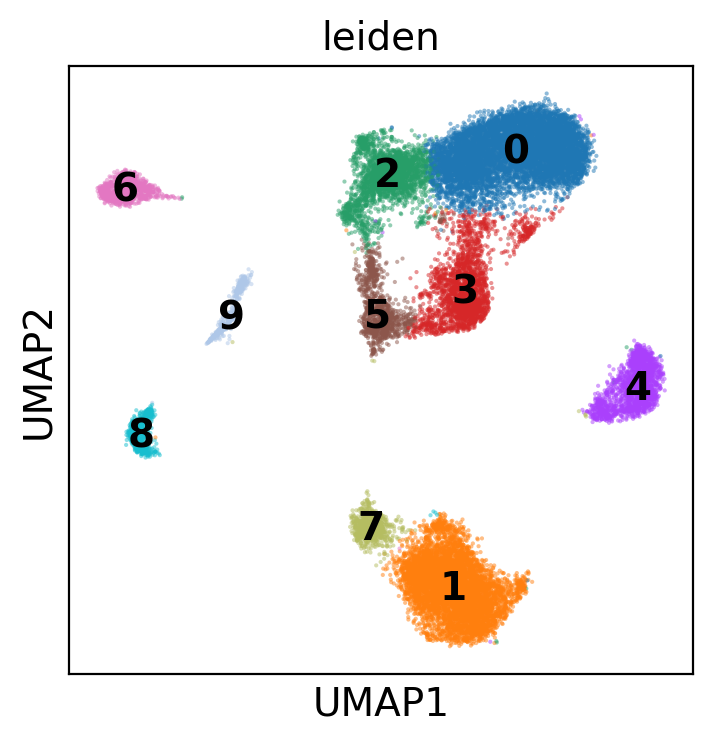

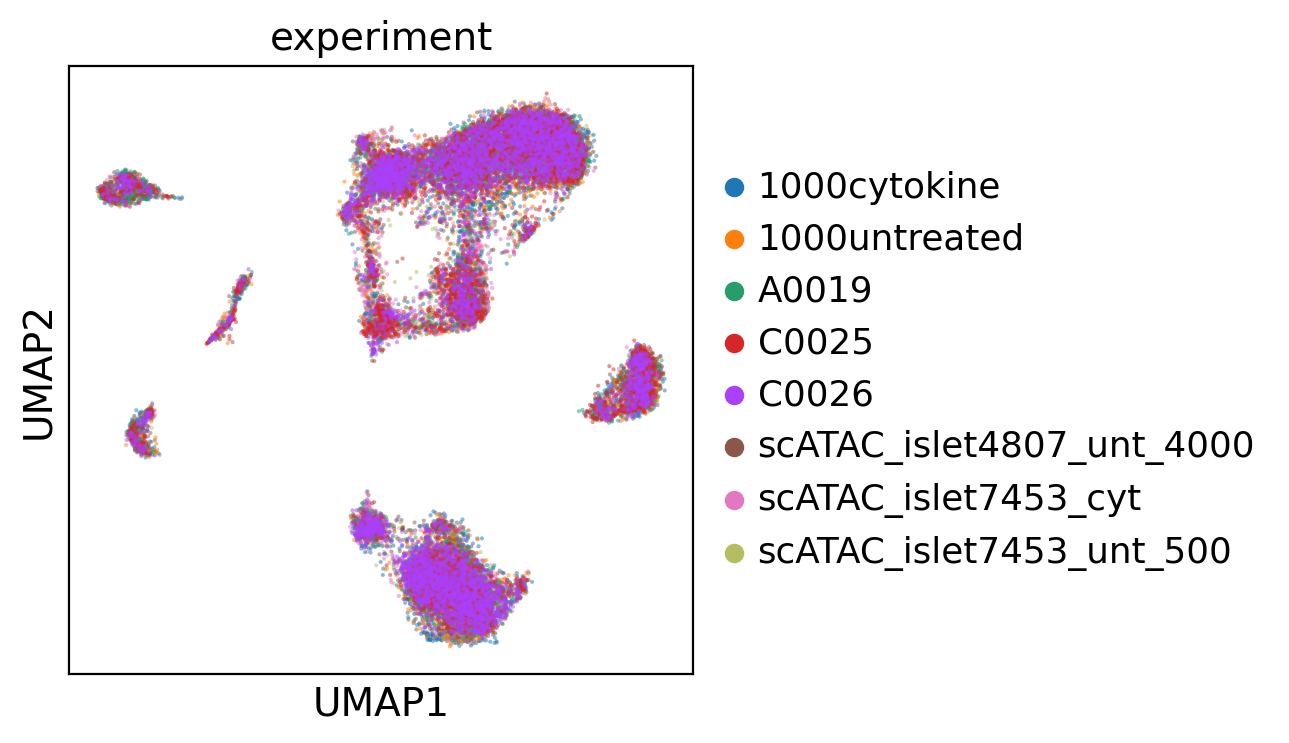

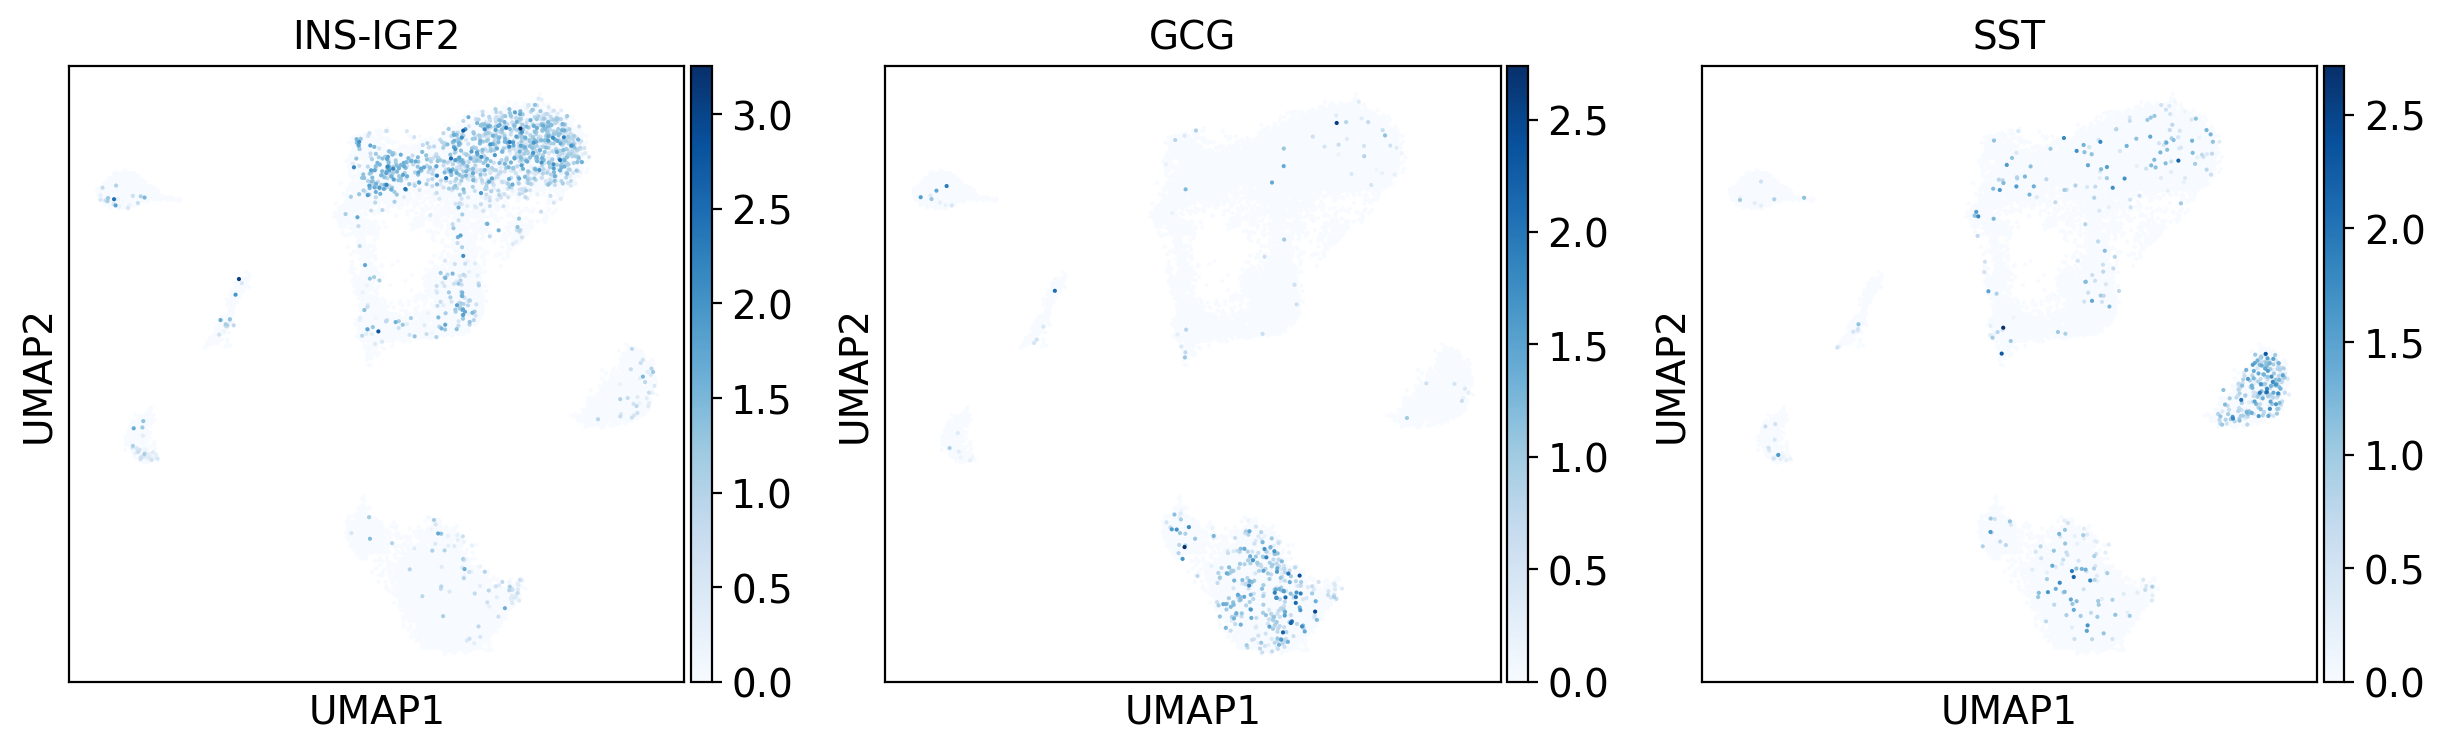

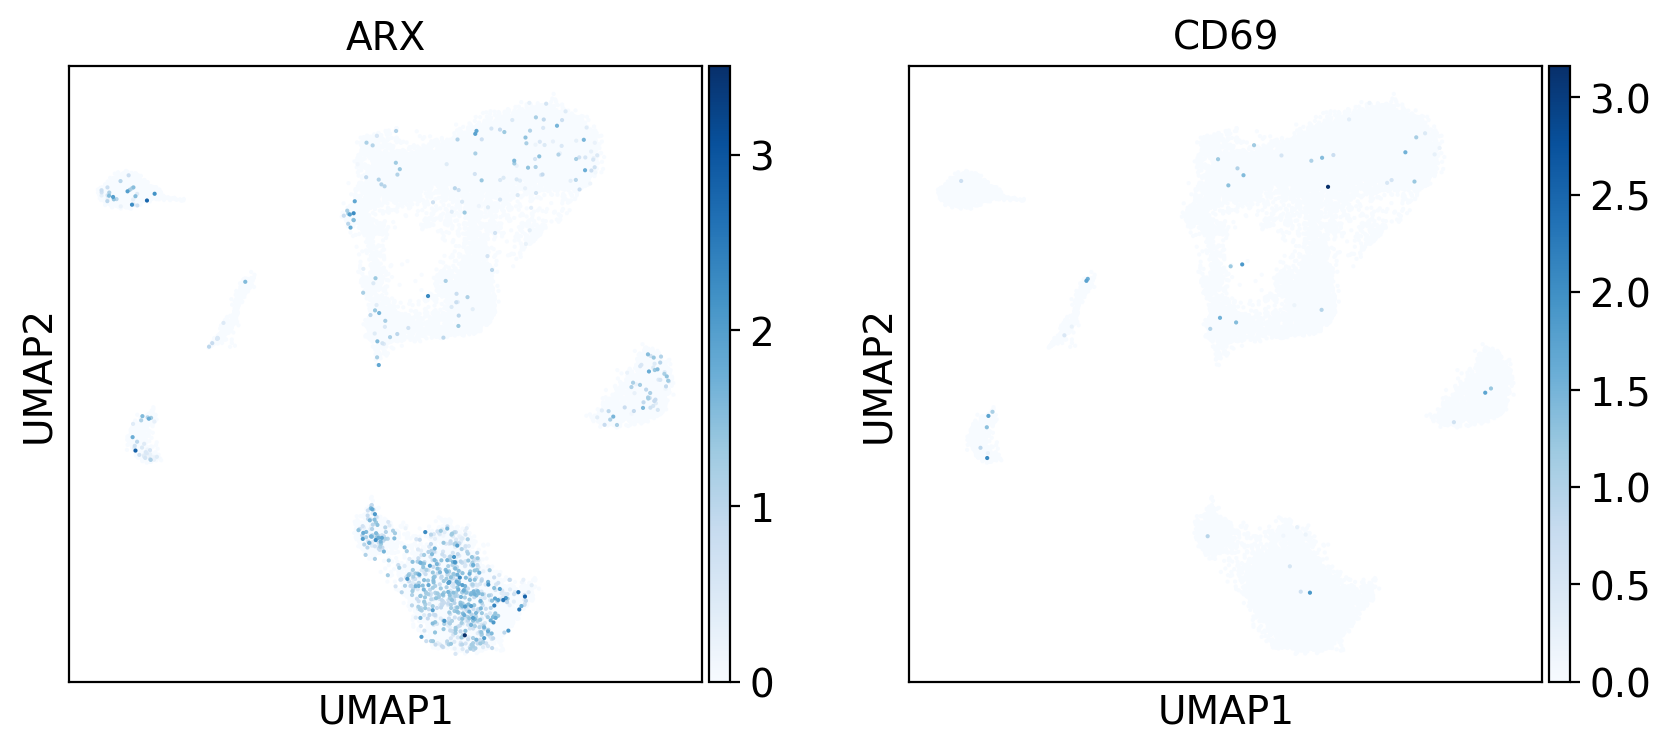

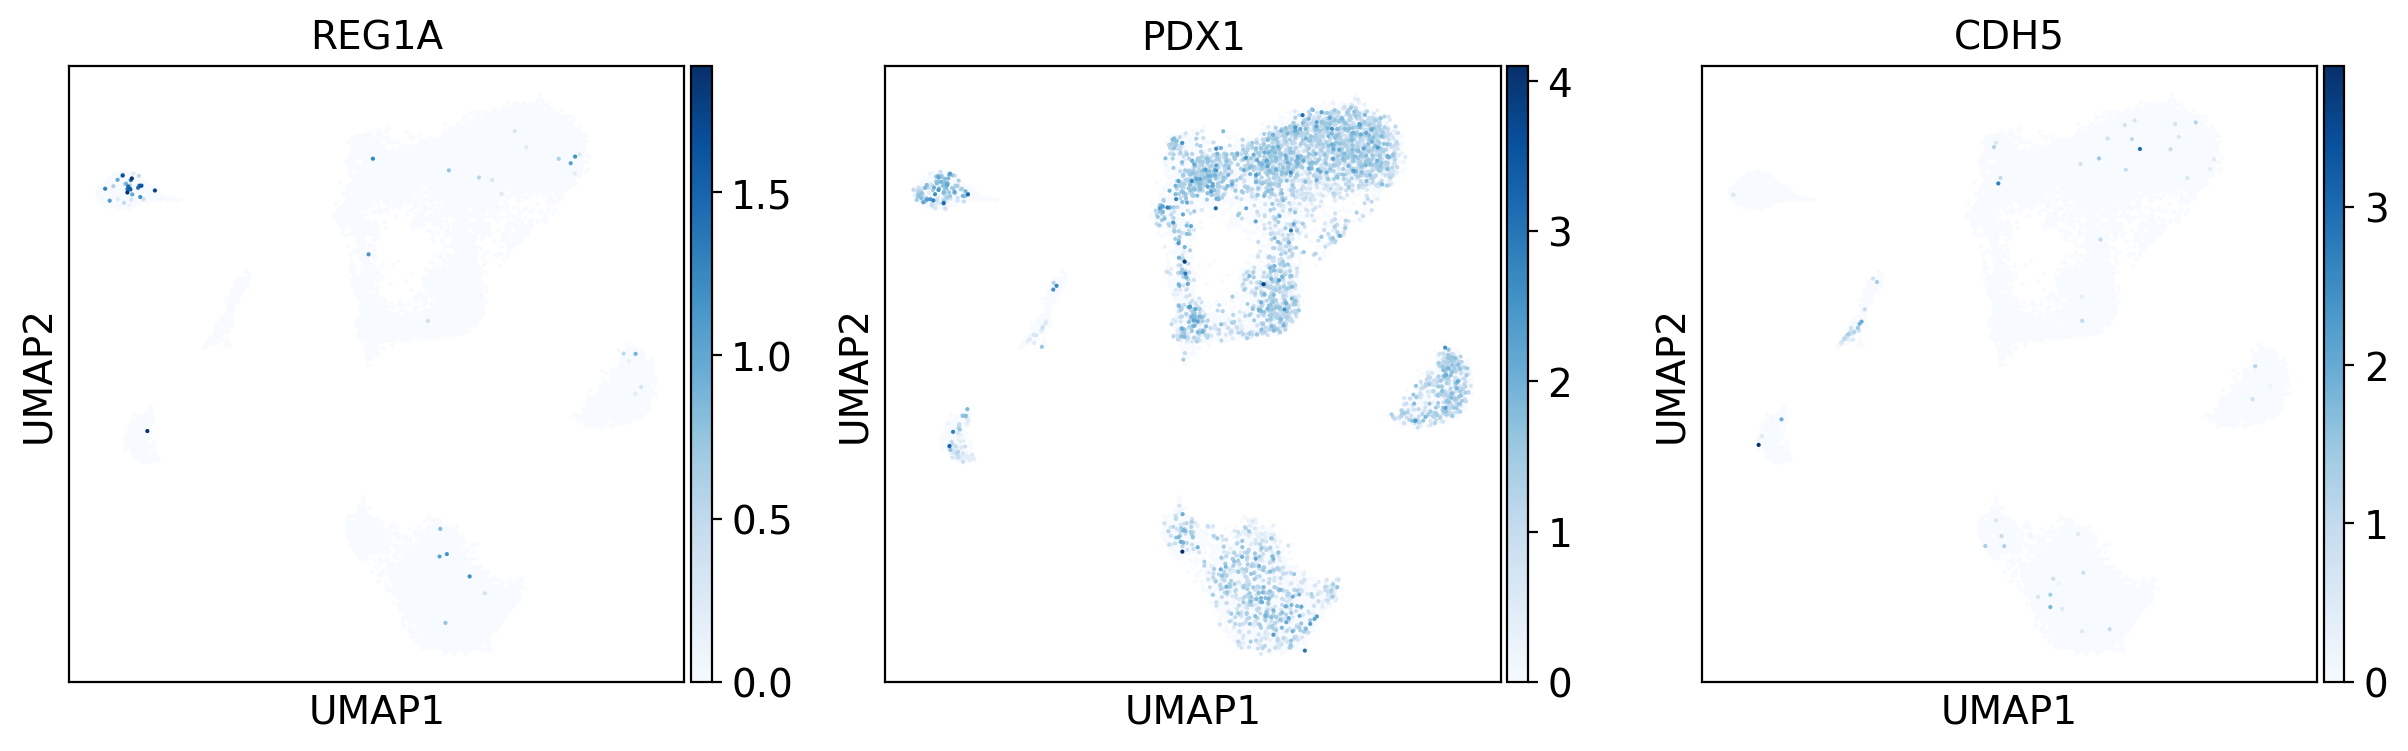

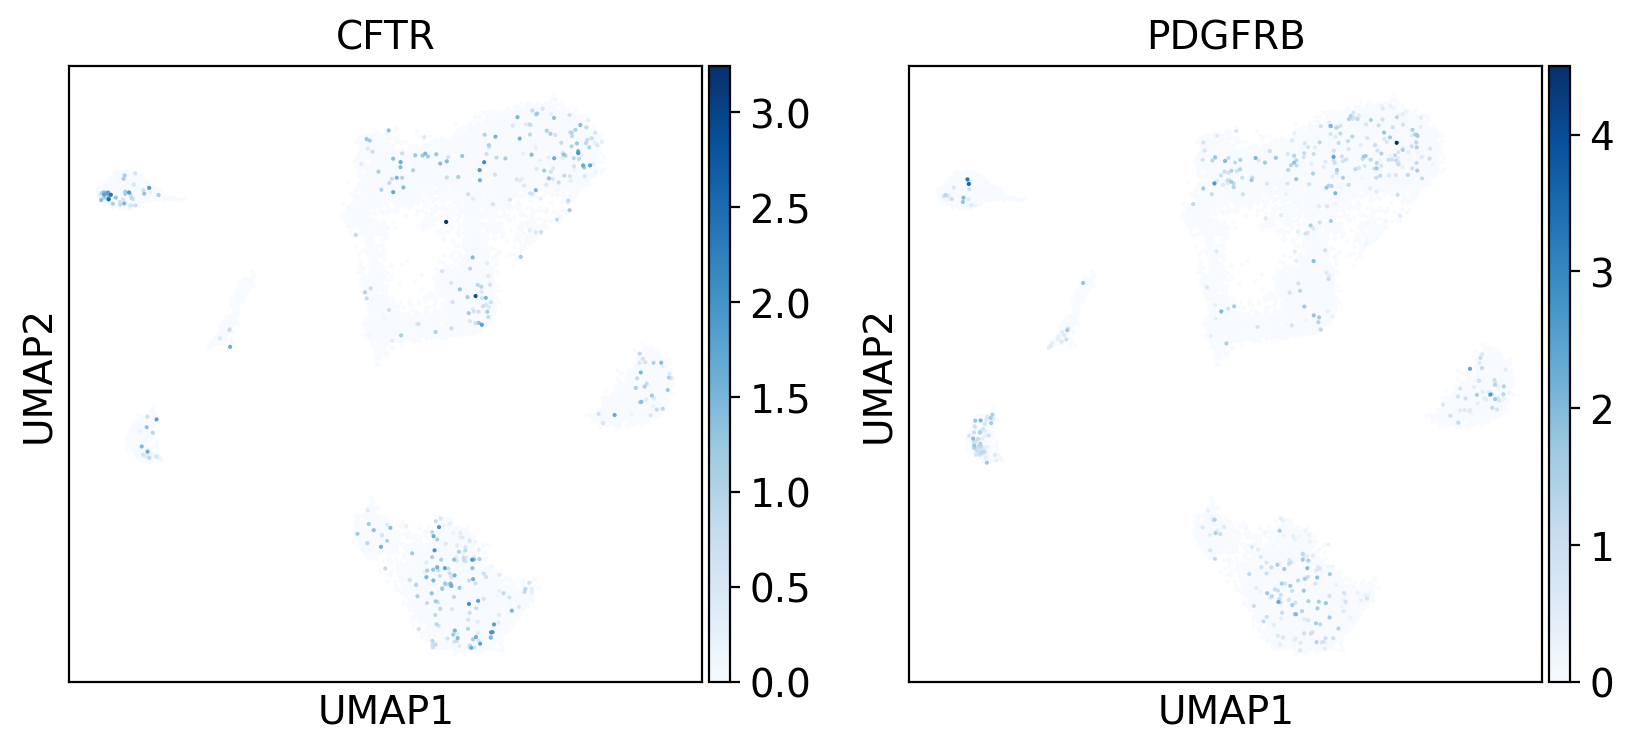

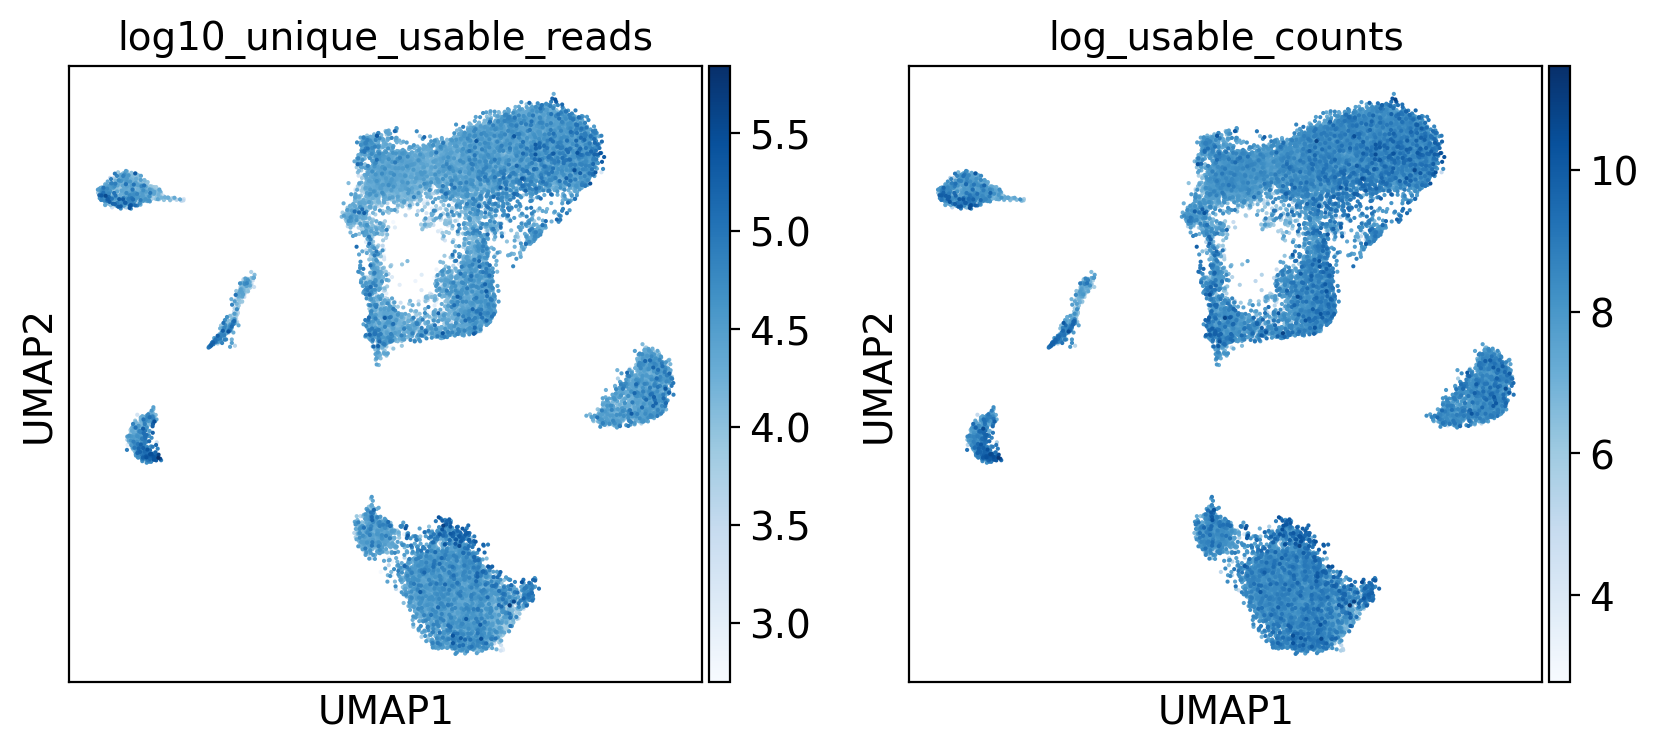

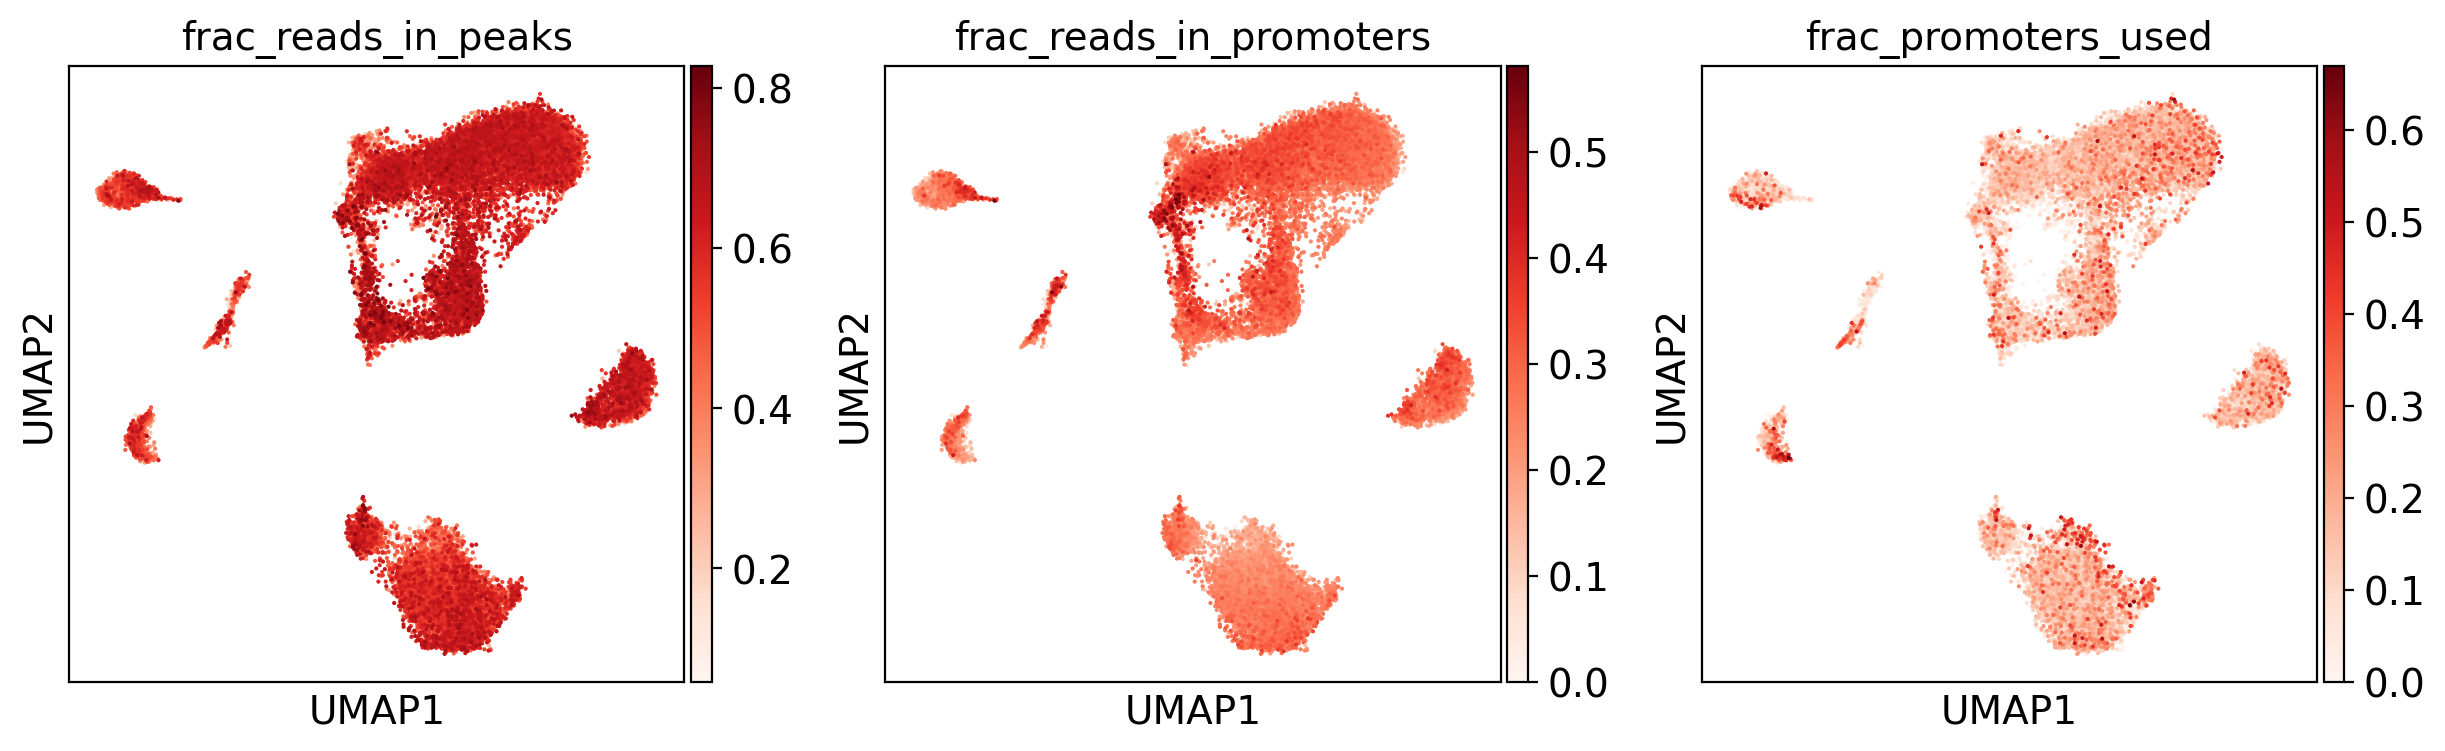

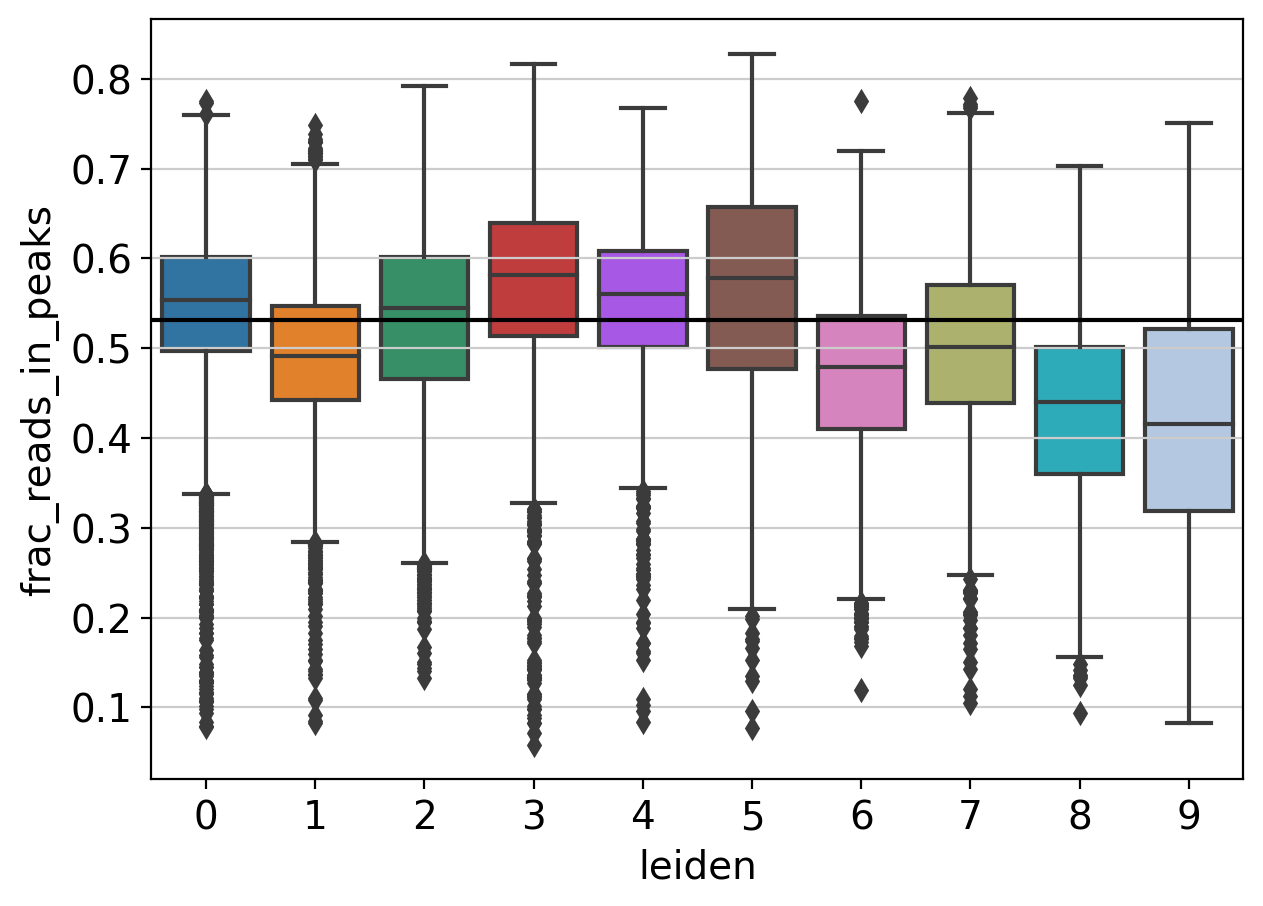

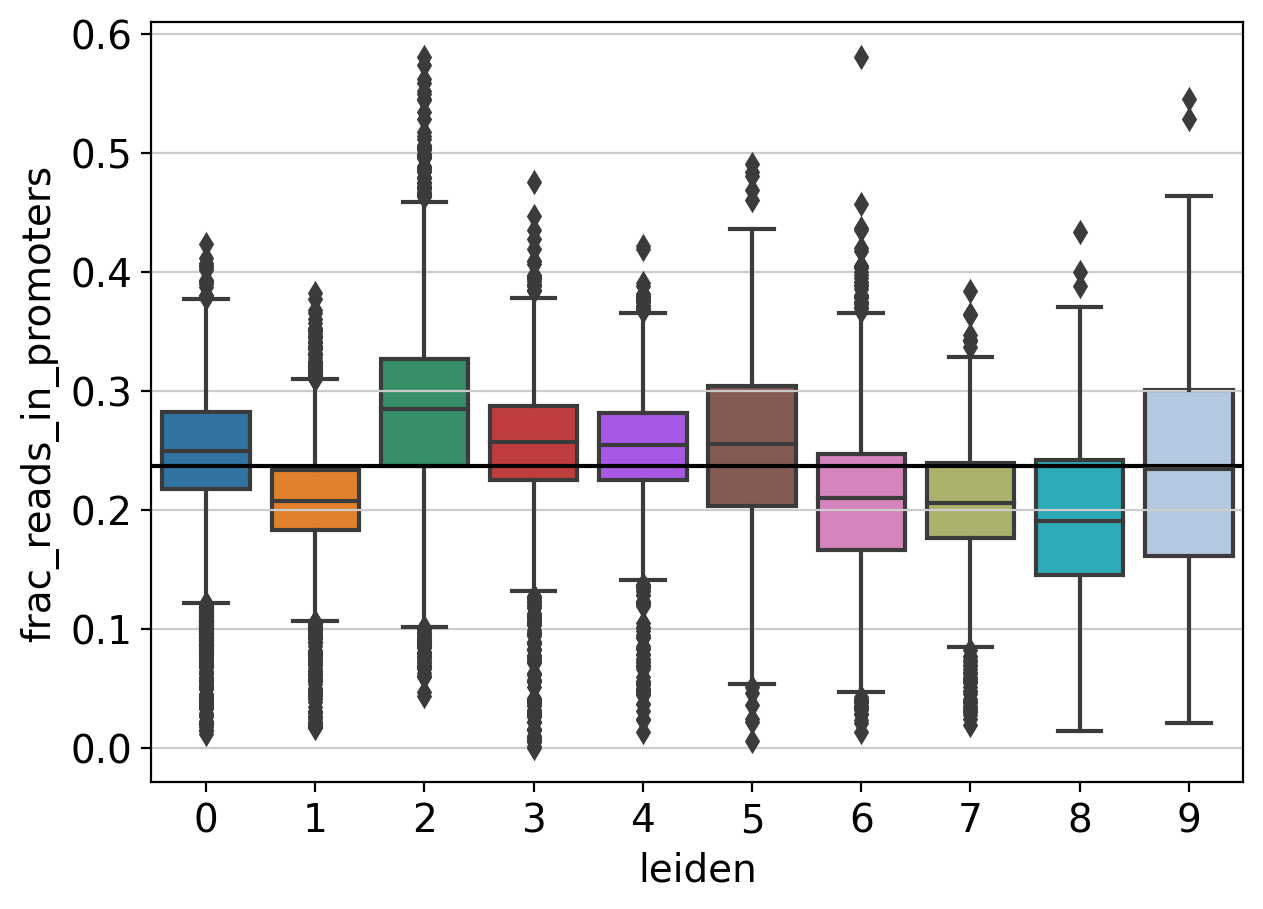

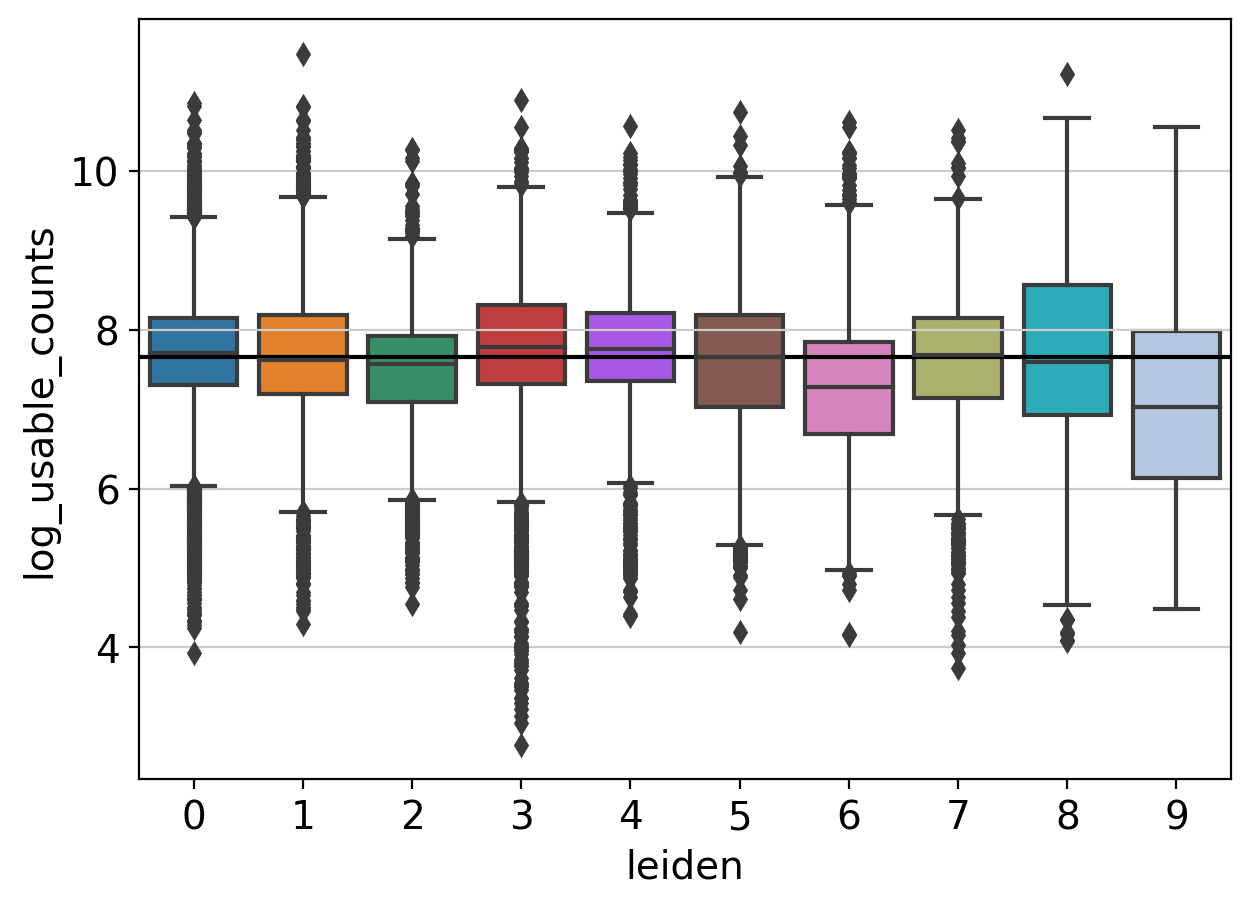

In [133]:
#adata_norm.obsm['X_pca'] = harmonized.values
sc.pp.neighbors(adata_norm, n_neighbors=30, method='umap', metric='cosine', random_state=0, n_pcs=50)
sc.tl.leiden(adata_norm, resolution=0.5, random_state=0)
sc.tl.umap(adata_norm, min_dist=0.3, random_state=0)

sc.settings.set_figure_params(dpi=100)
sc.pl.umap(adata_norm, color=['leiden'], size=9, alpha=.5, legend_loc='on data')
sc.pl.umap(adata_norm, color=['experiment'], size=9, alpha=.5)
#sc.pl.umap(adata_norm, color=['condition'], size=9, alpha=.5)

sc.pl.umap(adata_norm, color=['INS-IGF2','GCG','SST'], size=9, color_map='Blues', frameon=True, use_raw=True)
sc.pl.umap(adata_norm, color=['ARX','CD69'], size=9, color_map='Blues', frameon=True, use_raw=True)
sc.pl.umap(adata_norm, color=['REG1A','PDX1','CDH5'], size=9, color_map='Blues', frameon=True, use_raw=True)
sc.pl.umap(adata_norm, color=['CFTR','PDGFRB'], size=9, color_map='Blues', frameon=True, use_raw=True)

sc.pl.umap(adata_norm, color=['log10_unique_usable_reads','log_usable_counts'], size=9, color_map='Blues')

sc.pl.umap(adata_norm, color=['frac_reads_in_peaks','frac_reads_in_promoters','frac_promoters_used'], cmap='Reds', size=9, legend_loc='on data')

for metric in ['frac_reads_in_peaks','frac_reads_in_promoters','log_usable_counts']:
    fig, ax1 = plt.subplots(1,1,figsize=(7,5))
    sns.boxplot(x='leiden', y=metric, data=adata_norm.obs, ax=ax1)
    ax1.axhline(adata_norm.obs[metric].median(), color='black')
    plt.show()

#sc.pl.umap(adata_norm, color=['INS-IGF2','GCG','SST'], size=9, color_map='Blues', frameon=True, use_raw=True)
#sc.pl.umap(adata_norm, color=['ARX','CD69'], size=9, color_map='Blues', frameon=True, use_raw=True)
#sc.pl.umap(adata_norm, color=['REG1A','PDX1','CDH5'], size=9, color_map='Blues', frameon=True, use_raw=True)
#sc.pl.umap(adata_norm, color=['CFTR','PDGFRB'], size=9, color_map='Blues', frameon=True, use_raw=True)


In [134]:
adata_norm.obs

unique_usable_reads  \
scATAC_islet4807_unt_4000_AAACGAACACGACGAA                55794   
scATAC_islet4807_unt_4000_AAACGAACAGGTGGTA                79820   
scATAC_islet4807_unt_4000_AAACGAAGTTTGATCG                 9181   
scATAC_islet4807_unt_4000_AAACTGCGTACATGGG                 9348   
scATAC_islet4807_unt_4000_AAACTGCGTGCAAGAC                 6271   
...                                                         ...   
C0026_TTTGTGTGTGGCCTTG                                     9811   
C0026_TTTGTGTTCAGATACC                                    12284   
C0026_TTTGTGTTCATTCTTG                                    10274   
C0026_TTTGTGTTCCCTATTA                                    14403   
C0026_TTTGTGTTCGATCTTT                                     2804   

                                            total_sequenced_reads  \
scATAC_islet4807_unt_4000_AAACGAACACGACGAA                  96659   
scATAC_islet4807_unt_4000_AAACGAACAGGTGGTA                 166554   
scATAC_islet4807_unt_4000_AAACGAAGTTTGATCG                  27320   
scATAC_islet4807_unt_4000_AAACTGCGTACATGGG                  21914   
scATAC_islet4807_unt_4000_AAACTGCGTGCAAGAC                  12404   
...                                                           ...   
C0026_TTTGTGTGTGGCCTTG                                      11729   
C0026_TTTGTGTTCAGATACC                                      14590   
C0026_TTTGTGTTCATTCTTG                                      12476   
C0026_TTTGTGTTCCCTATTA                                      16710   
C0026_TTTGTGTTCGATCTTT                                       3298   

                                            duplicated_reads  \
scATAC_islet4807_unt_4000_AAACGAACACGACGAA             40396   
scATAC_islet4807_unt_4000_AAACGAACAGGTGGTA             84769   
scATAC_islet4807_unt_4000_AAACGAAGTTTGATCG             16896   
scATAC_islet4807_unt_4000_AAACTGCGTACATGGG             11555   
scATAC_islet4807_unt_4000_AAACTGCGTGCAAGAC              5891   
...                                                      ...   
C0026_TTTGTGTGTGGCCTTG                                  1828   
C0026_TTTGTGTTCAGATACC                                  2028   
C0026_TTTGTGTTCATTCTTG                                  2137   
C0026_TTTGTGTTCCCTATTA                                  2021   
C0026_TTTGTGTTCGATCTTT                                   438   

                                            unique_mito_reads  reads_in_peaks  \
scATAC_islet4807_unt_4000_AAACGAACACGACGAA                 26           27077   
scATAC_islet4807_unt_4000_AAACGAACAGGTGGTA               1111           46876   
scATAC_islet4807_unt_4000_AAACGAAGTTTGATCG               1092            3077   
scATAC_islet4807_unt_4000_AAACTGCGTACATGGG                881            3058   
scATAC_islet4807_unt_4000_AAACTGCGTGCAAGAC                143            2215   
...                                                       ...             ...   
C0026_TTTGTGTGTGGCCTTG                                     42            5803   
C0026_TTTGTGTTCAGATACC                                    146            6027   
C0026_TTTGTGTTCATTCTTG                                     20            5600   
C0026_TTTGTGTTCCCTATTA                                     12            8035   
C0026_TTTGTGTTCGATCTTT                                     18            2078   

                                            reads_in_promoters  tss_used  \
scATAC_islet4807_unt_4000_AAACGAACACGACGAA               10099      4143   
scATAC_islet4807_unt_4000_AAACGAACAGGTGGTA               20344      6447   
scATAC_islet4807_unt_4000_AAACGAAGTTTGATCG                1031       519   
scATAC_islet4807_unt_4000_AAACTGCGTACATGGG                1016       497   
scATAC_islet4807_unt_4000_AAACTGCGTGCAAGAC                 895       427   
...                                                        ...       ...   
C0026_TTTGTGTGTGGCCTTG                                    2527      1208   
C0026_TTTGTGTTCAGATACC                                    36

In [137]:
adata_norm

AnnData object with n_obs × n_vars = 25200 × 62787
    obs: 'unique_usable_reads', 'total_sequenced_reads', 'duplicated_reads', 'unique_mito_reads', 'reads_in_peaks', 'reads_in_promoters', 'tss_used', 'frac_reads_in_peaks', 'frac_reads_in_promoters', 'frac_promoters_used', 'frac_mito_reads', 'frac_duplicated_reads', 'experiment', 'log10_unique_usable_reads', 'n_counts', 'log_usable_counts', 'norm', 'leiden', 'subset'
    var: 'mean', 'std'
    uns: 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'experiment_colors', 'subset_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [121]:
#Remove low FRIP
wd = '/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/cleanup_1210/'
#adata_norm.obs.loc[(adata_norm.obs['leiden'].isin(['8']))].to_csv('cluster8.wind', header=None, columns=[])
adata_norm.obs.loc[(adata_norm.obs['leiden'].isin(['10','11']))].to_csv(os.path.join(wd, 'lowfrip.6'), header=None, columns=[])


In [139]:
#WRITE FINAL H5AD
adata_norm.obs.to_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/islet_biobank_peaks.txt', sep='\t')

adata_norm.write_h5ad('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/islet_biobank_peaks.h5ad')


# Remove Doublets

In [130]:
#Remove doublet
wd = '/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/cleanup_1210/'
adata_norm.obs.loc[(adata_norm.obs['subset'].isin(['8,6','8,11']))].to_csv(os.path.join(wd, 'doublet_8.4'), header=None, columns=[])



running Leiden clustering
    finished: found 23 clusters and added
    'subset', the cluster labels (adata.obs, categorical) (0:00:00)


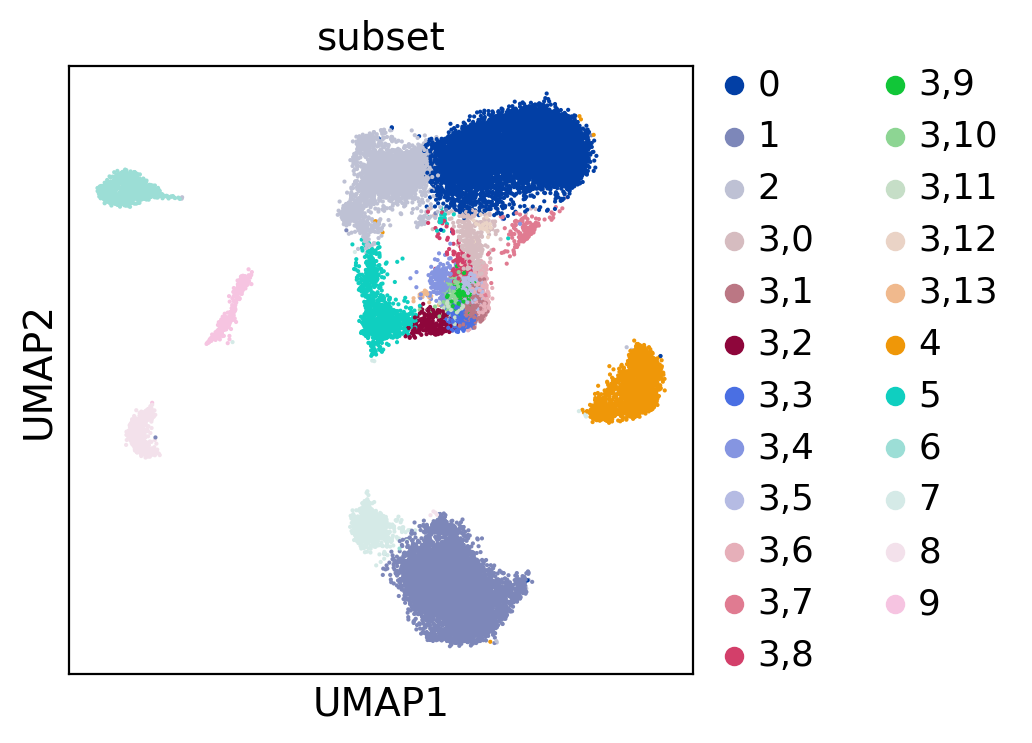

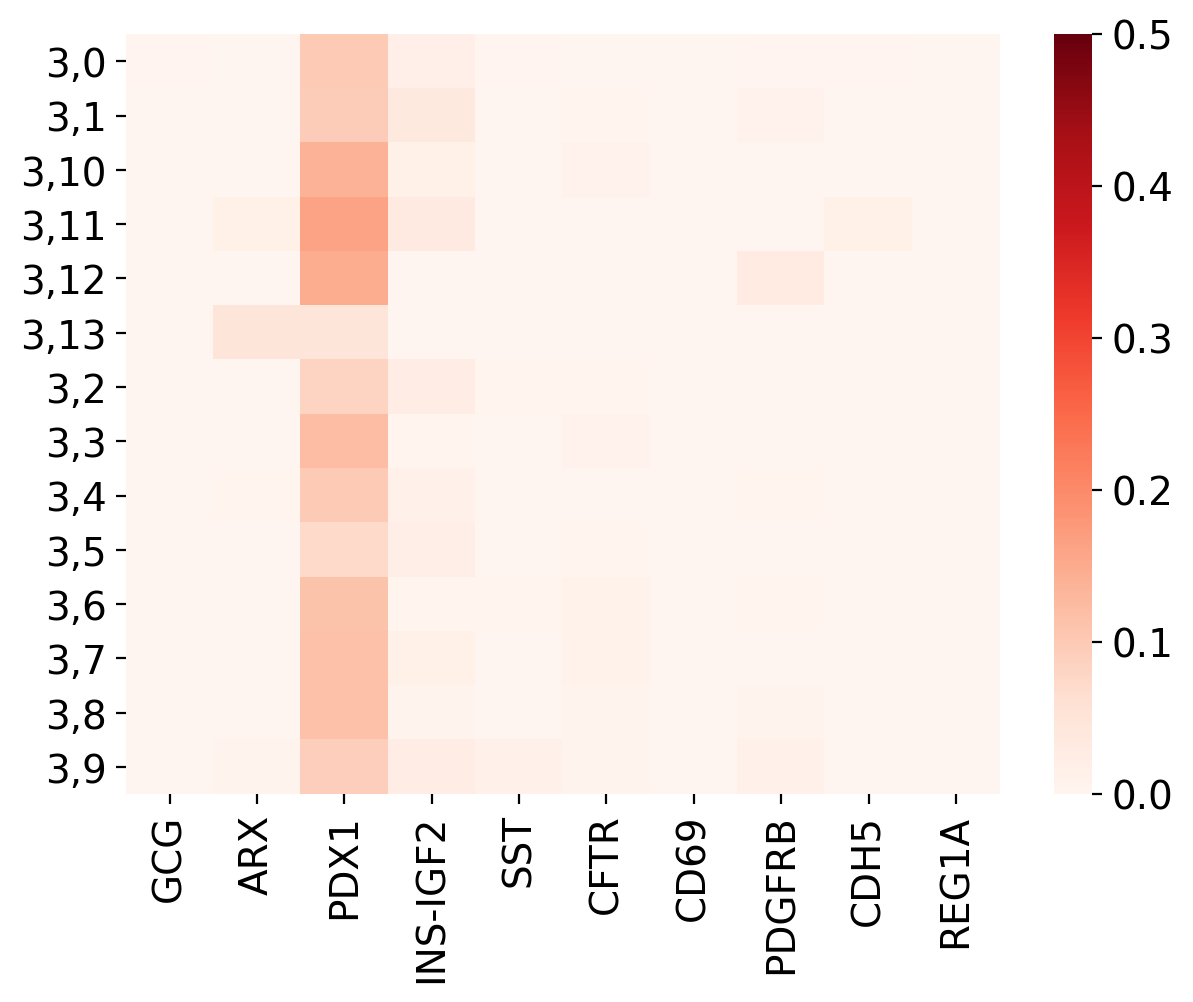

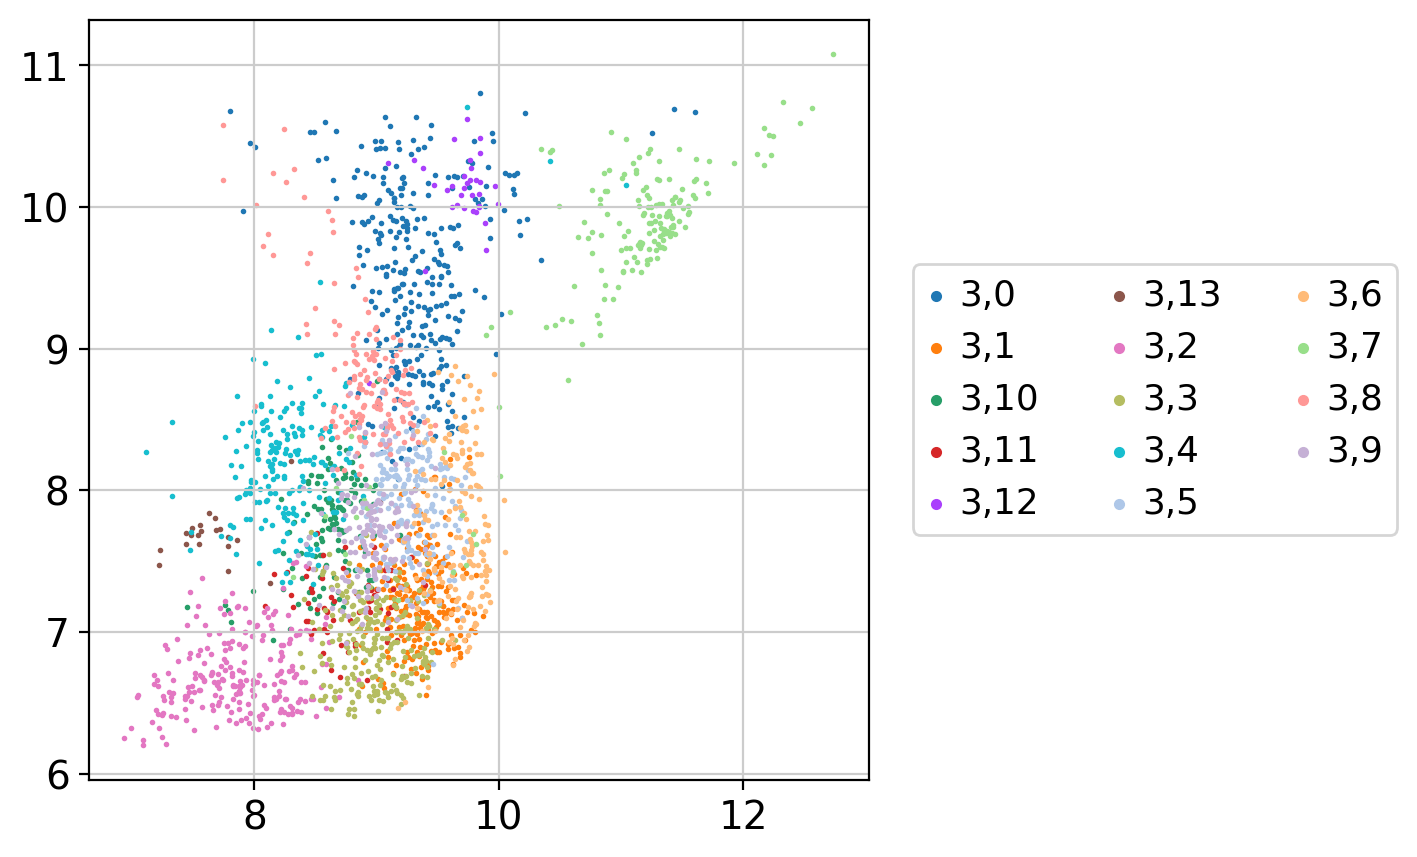

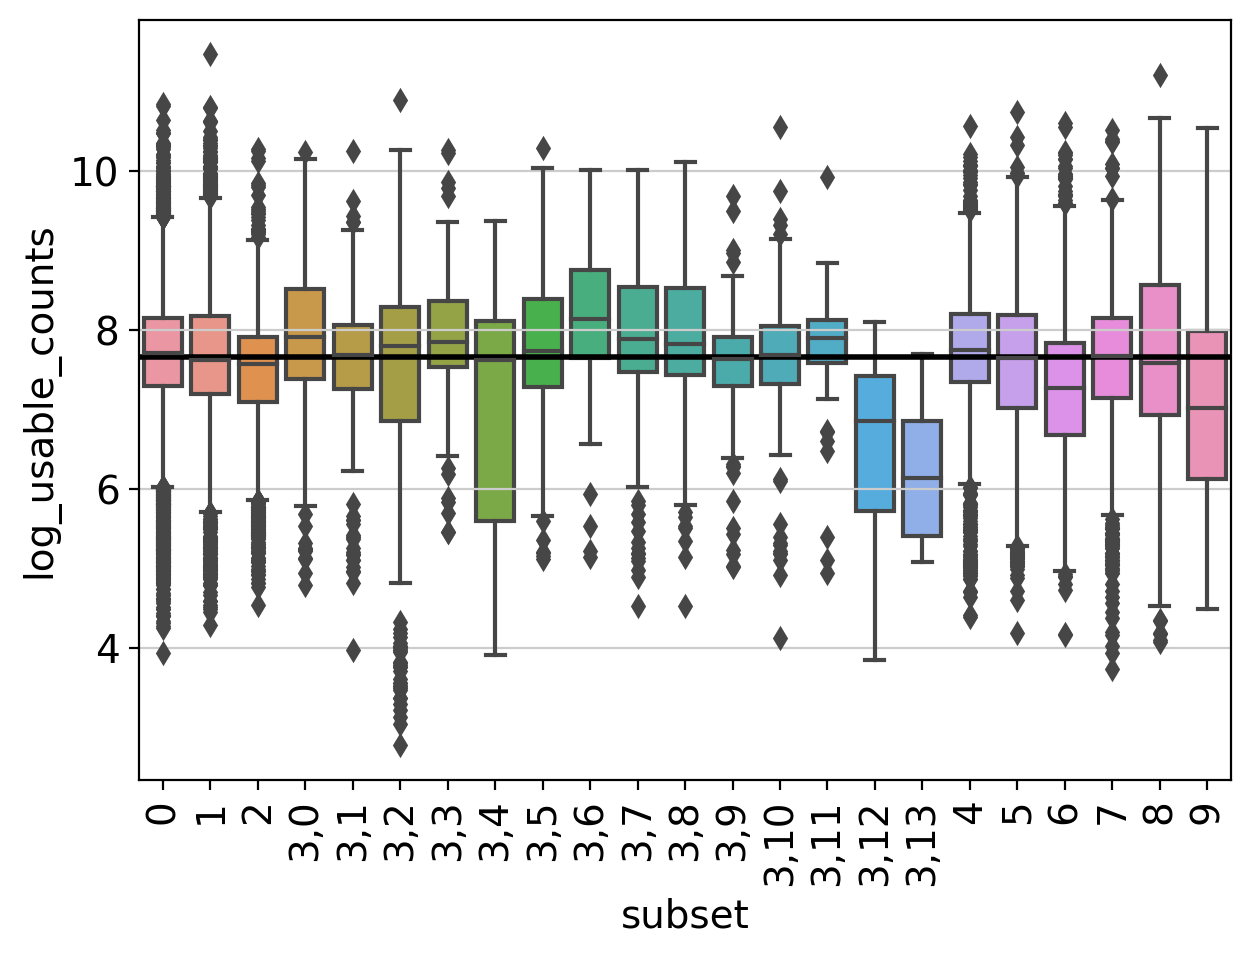

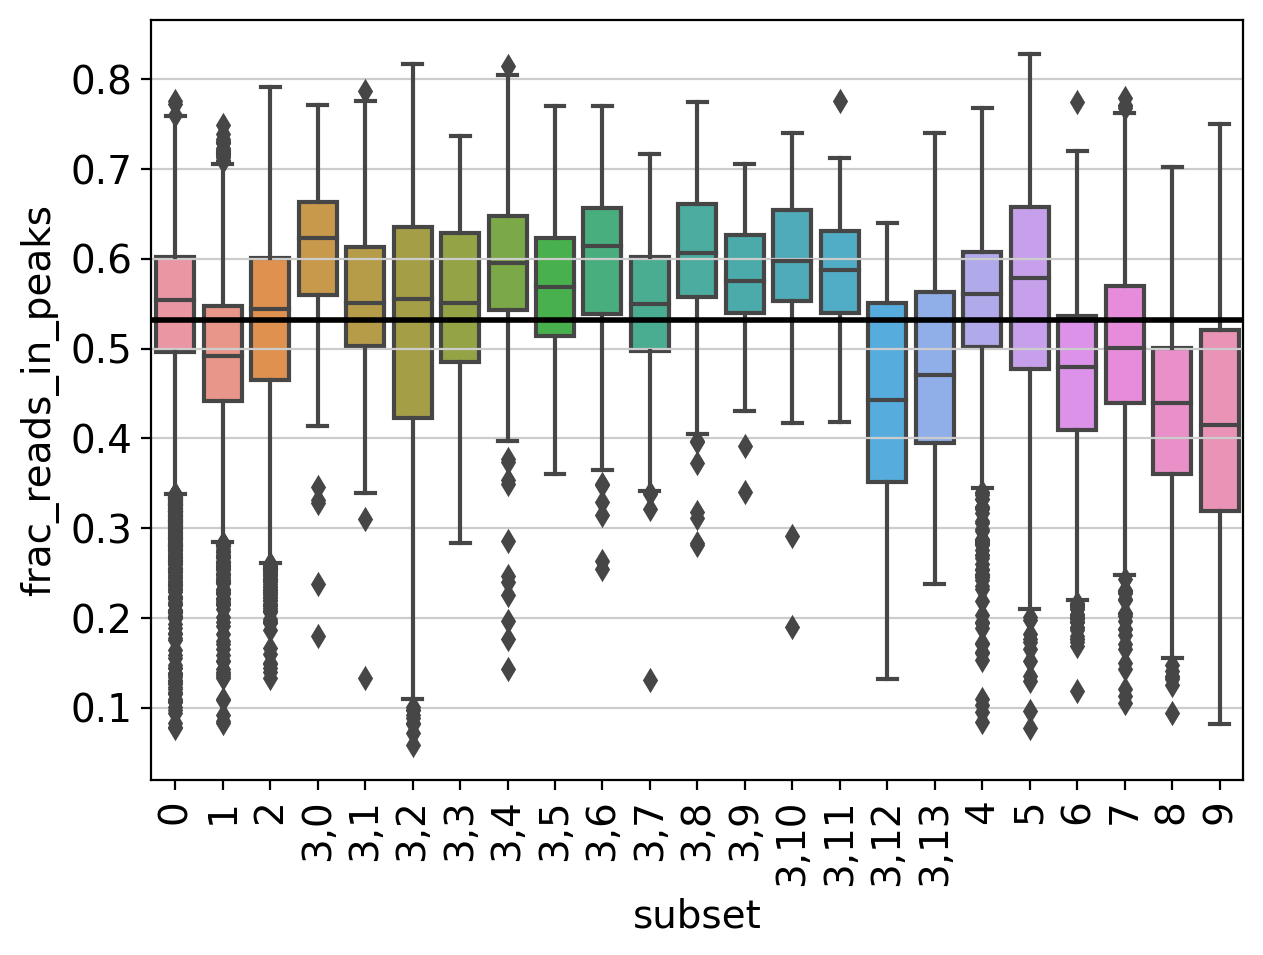

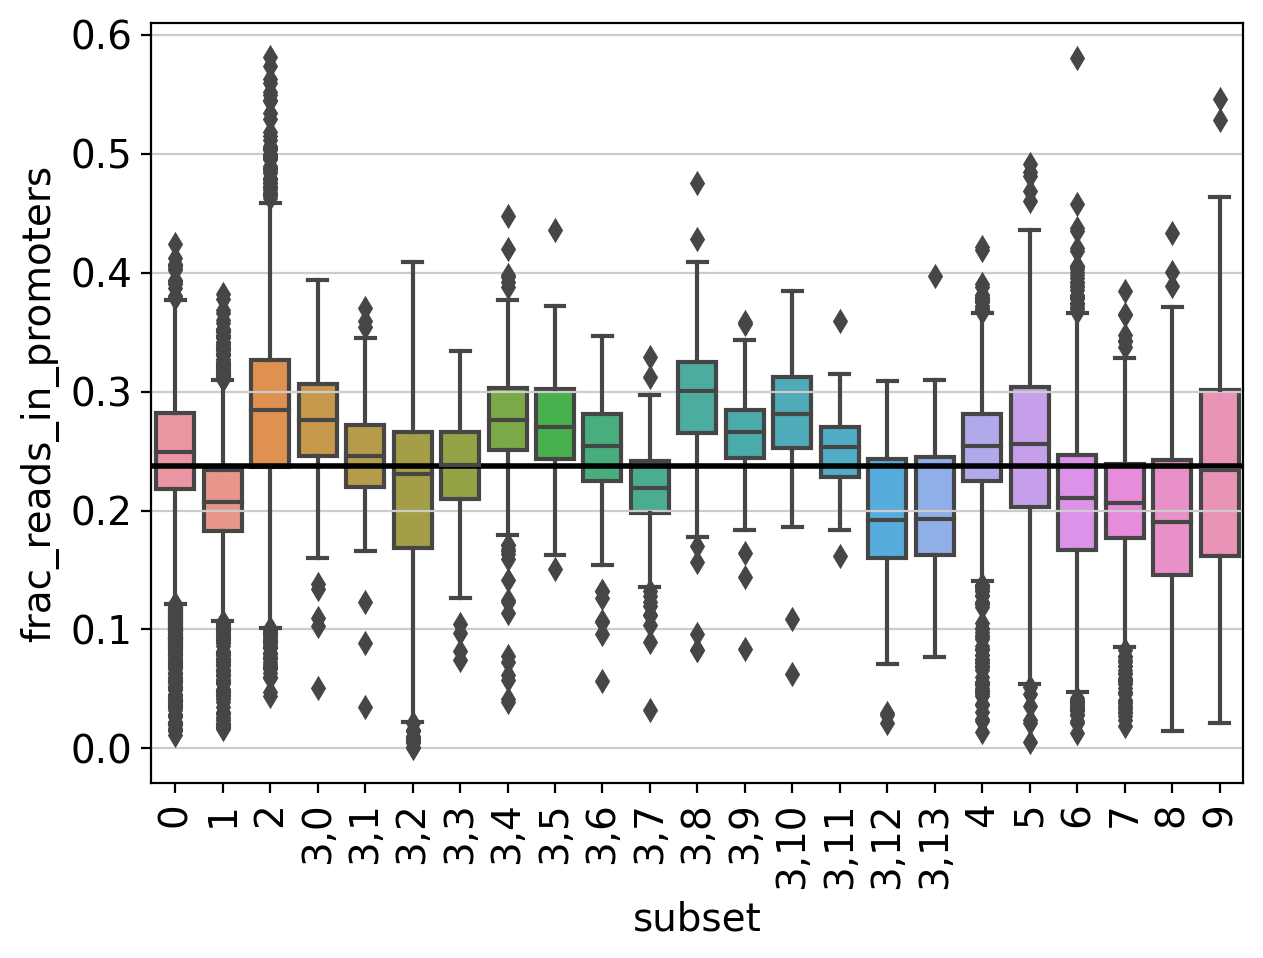

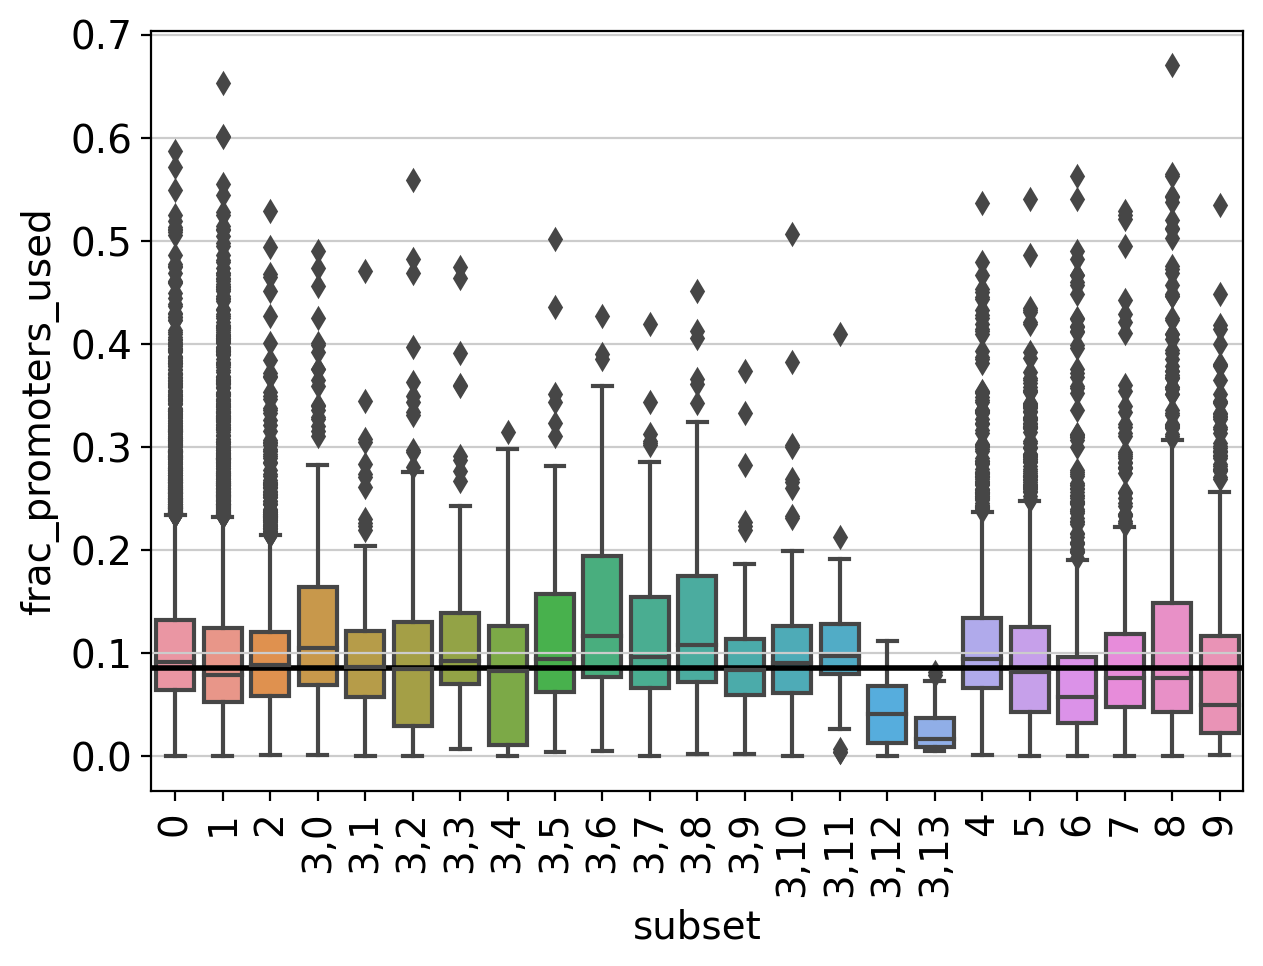

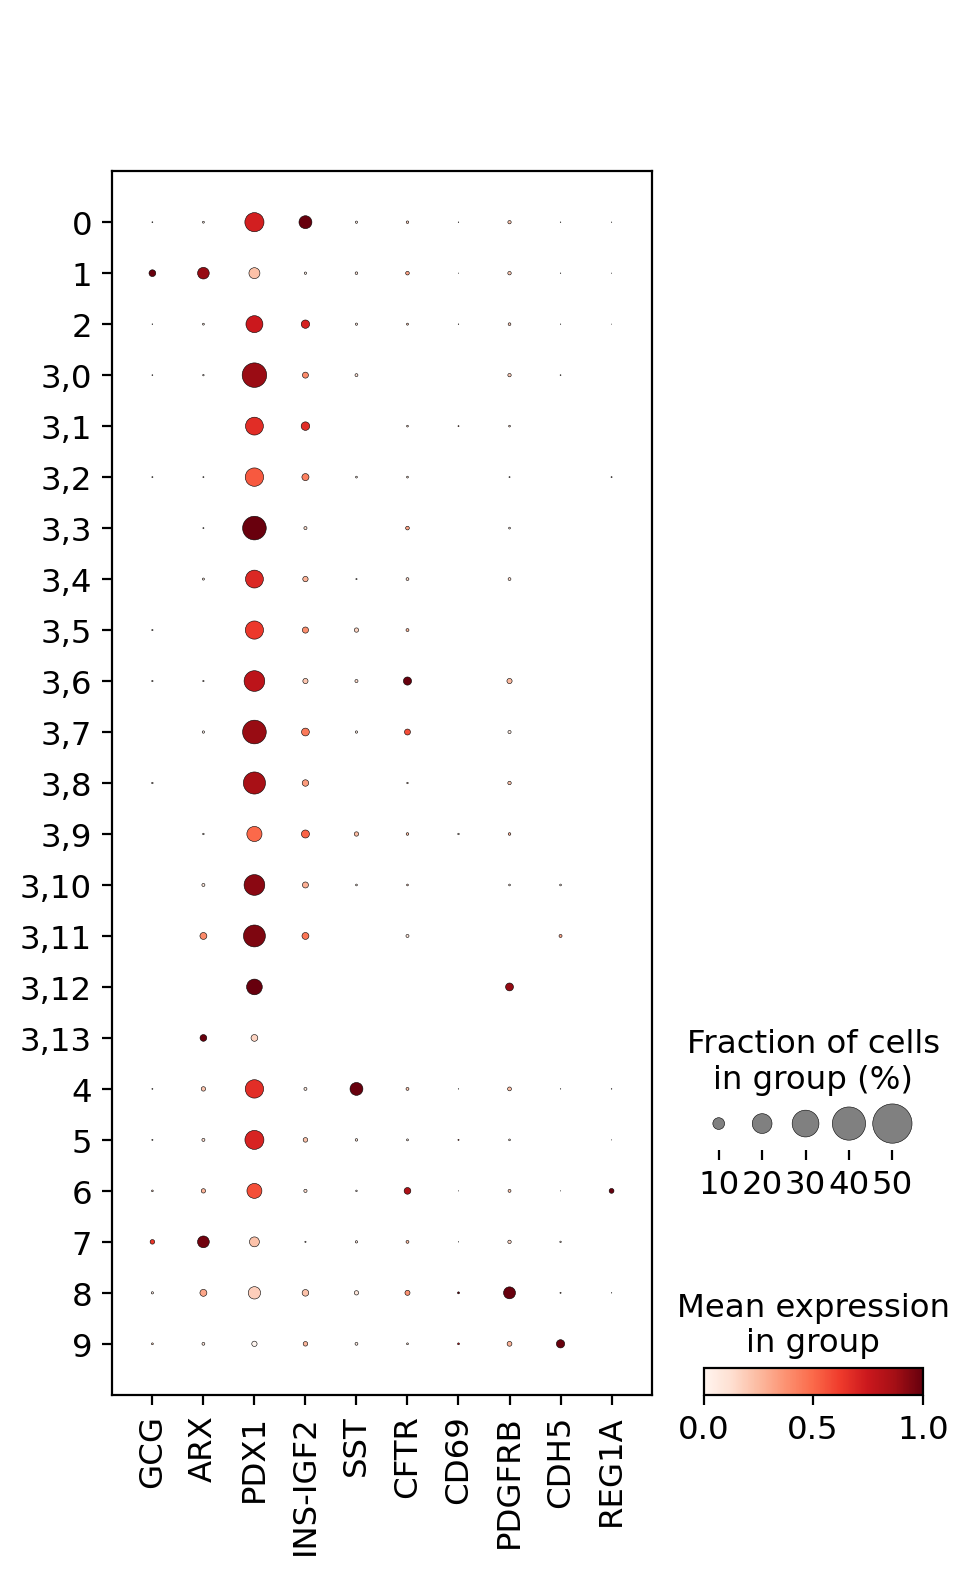

In [136]:
#8,5,7
subset_cluster = ['3']
sc.tl.leiden(adata_norm, restrict_to=('leiden',subset_cluster), resolution=1.5, random_state=0, key_added='subset')
sc.pl.umap(adata_norm, color=['subset'], size=9)#, legend_loc='on data')
adata_norm_obs = adata_norm.obs.copy()
adata_norm_obs['cells'] = 1
subset_genes = ['GCG','ARX', 'PDX1', 'INS-IGF2', 'SST', 'CFTR','CD69', 'PDGFRB', 'CDH5', 'REG1A']
for gene in subset_genes:
    adata_norm_obs[gene] = (adata_norm.raw.X[:,adata_norm.raw.var.index.get_loc(gene)].todense().A1 >= 1).astype(int)
subset_obs = adata_norm_obs.loc[adata_norm_obs['subset'].str.contains(',')]
subset_pct = pd.DataFrame(index=sorted(set(subset_obs['subset'])))
for gene in subset_genes:
    subset_pct[gene] = (subset_obs.groupby('subset')[gene].sum()/subset_obs.groupby('subset')['cells'].count()).dropna()
fig, ax1 = plt.subplots(1,1,figsize=(7,5))
sns.heatmap(subset_pct, cmap='Reds', yticklabels=1, ax=ax1, vmin=0, vmax=.5)
plt.show()
fig, ax1 = plt.subplots(1,1,figsize=(5,5))
subset = adata_norm.obs.join(pd.DataFrame(adata_norm.obsm['X_umap'], index=adata_norm.obs.index, columns=['UMAP1','UMAP2']), how='inner', rsuffix='_right')
subset = subset.loc[subset['leiden'].isin(subset_cluster)]
for s in sorted(set(subset['subset'])):
    ax1.scatter(subset.loc[subset['subset']==s, 'UMAP1'], subset.loc[subset['subset']==s, 'UMAP2'], alpha=1, s=1, label=s)
ax1.legend(markerscale=3, ncol=3, loc='center right', bbox_to_anchor=(1.7, .5))
#ax1.axvline(1.5)
plt.show()
for metric in ['log_usable_counts','frac_reads_in_peaks','frac_reads_in_promoters','frac_promoters_used']:
    fig, ax1 = plt.subplots(1,1,figsize=(7,5))
    sns.boxplot(x='subset', y=metric, data=adata_norm.obs, ax=ax1)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    ax1.axhline(adata_norm.obs[metric].median(), color='black', lw=2)
    plt.show()
sc.pl.dotplot(adata_norm, subset_genes,
              dot_max=.5, standard_scale='var', groupby='subset', dendrogram=False, use_raw=True)

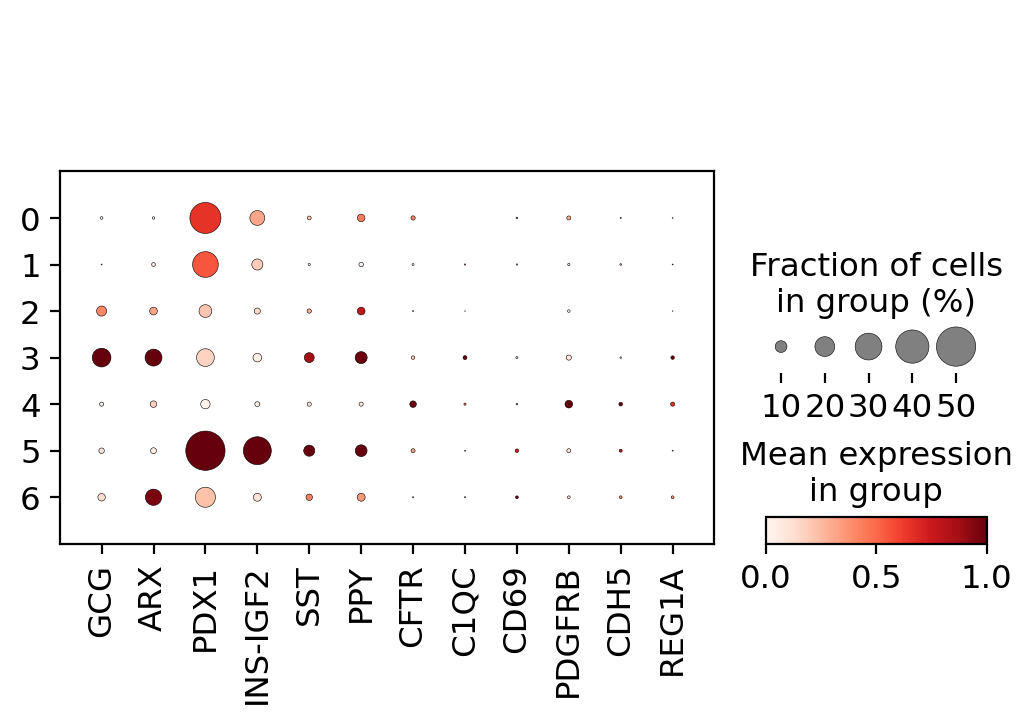

In [104]:
sc.pl.dotplot(adata_norm, subset_genes,
              dot_max=.5, standard_scale='var', groupby='leiden', dendrogram=False, use_raw=True)

# Write to file

In [138]:
#adata_norm.obs.to_csv('/nfs/lab/elisha/2020nPOD/gaulton/final/batch3/nPOD_final_21.txt', sep='\t')
adata_norm.obs.to_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/islet_biobank_peaks.txt', sep='\t')


#cluster = pd.read_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/cytunt_pks_1116.txt', sep='\t', index_col = 0)
#cluster

In [15]:
def changeCondition(s):
    if "cyt" in s:
        return "cytokine"
    elif "unt" in s:
        return "untreated"

cluster['condition'] = cluster['experiment'].apply(changeCondition)

In [16]:
cluster

unique_usable_reads  \
scATAC_islet4807_unt_4000_AAACGAACACGACGAA                55794   
scATAC_islet4807_unt_4000_AAACGAACAGGTGGTA                79820   
scATAC_islet4807_unt_4000_AAACGAAGTTTGATCG                 9181   
scATAC_islet4807_unt_4000_AAACTGCGTACATGGG                 9348   
scATAC_islet4807_unt_4000_AAAGATGAGCAACTGG                 4425   
...                                                         ...   
1000untreated_TTTGGTTTCGACTCGG                            28275   
1000untreated_TTTGTGTAGGAAGGTA                            30098   
1000untreated_TTTGTGTCAAGTGGCA                            32805   
1000untreated_TTTGTGTGTGGATTCT                            32757   
1000untreated_TTTGTGTGTGTCTACA                            51267   

                                            total_sequenced_reads  \
scATAC_islet4807_unt_4000_AAACGAACACGACGAA                  96659   
scATAC_islet4807_unt_4000_AAACGAACAGGTGGTA                 166554   
scATAC_islet4807_unt_4000_AAACGAAGTTTGATCG                  27320   
scATAC_islet4807_unt_4000_AAACTGCGTACATGGG                  21914   
scATAC_islet4807_unt_4000_AAAGATGAGCAACTGG                  13933   
...                                                           ...   
1000untreated_TTTGGTTTCGACTCGG                              39595   
1000untreated_TTTGTGTAGGAAGGTA                              52755   
1000untreated_TTTGTGTCAAGTGGCA                              50800   
1000untreated_TTTGTGTGTGGATTCT                              52571   
1000untreated_TTTGTGTGTGTCTACA                              96270   

                                            duplicated_reads  \
scATAC_islet4807_unt_4000_AAACGAACACGACGAA             40396   
scATAC_islet4807_unt_4000_AAACGAACAGGTGGTA             84769   
scATAC_islet4807_unt_4000_AAACGAAGTTTGATCG             16896   
scATAC_islet4807_unt_4000_AAACTGCGTACATGGG             11555   
scATAC_islet4807_unt_4000_AAAGATGAGCAACTGG              9390   
...                                                      ...   
1000untreated_TTTGGTTTCGACTCGG                         11156   
1000untreated_TTTGTGTAGGAAGGTA                         21014   
1000untreated_TTTGTGTCAAGTGGCA                         17810   
1000untreated_TTTGTGTGTGGATTCT                         19587   
1000untreated_TTTGTGTGTGTCTACA                         43160   

                                            unique_mito_reads  reads_in_peaks  \
scATAC_islet4807_unt_4000_AAACGAACACGACGAA                 26           27077   
scATAC_islet4807_unt_4000_AAACGAACAGGTGGTA               1111           46876   
scATAC_islet4807_unt_4000_AAACGAAGTTTGATCG               1092            3077   
scATAC_islet4807_unt_4000_AAACTGCGTACATGGG                881            3058   
scATAC_islet4807_unt_4000_AAAGATGAGCAACTGG                 38            1275   
...                                                       ...             ...   
1000untreated_TTTGGTTTCGACTCGG                             28           12969   
1000untreated_TTTGTGTAGGAAGGTA                           1488           20119   
1000untreated_TTTGTGTCAAGTGGCA                             58           16240   
1000untreated_TTTGTGTGTGGATTCT                             54           22367   
1000untreated_TTTGTGTGTGTCTACA                           1633           33989   

                                            reads_in_promoters  tss_used  \
scATAC_islet4807_unt_4000_AAACGAACACGACGAA               10099      4143   
scATAC_islet4807_unt_4000_AAACGAACAGGTGGTA               20344      6447   
scATAC_islet4807_unt_4000_AAACGAAGTTTGATCG                1031       519   
scATAC_islet4807_unt_4000_AAACTGCGTACATGGG                1016       497   
scATAC_islet4807_unt_4000_AAAGATGAGCAACTGG                 308       133   
...                                                        ...       ...   
1000untreated_TTTGGTTTCGACTCGG                            5086      2144   
1000untreated_TTTGTGTAGGAAGGTA                            86

In [20]:
zero = cluster[cluster['leiden'] == 0]
one = cluster[cluster['leiden'] == 1]
two = cluster[cluster['leiden'] == 2]
three = cluster[cluster['leiden'] ==3]
four = cluster[cluster['leiden'] == 4]
five = cluster[cluster['leiden'] == 5]
six = cluster[cluster['leiden'] == 6]
seven = cluster[cluster['leiden'] == 7]
eight = cluster[cluster['leiden'] == 8]

In [30]:
temp = eight.groupby('condition').count()
temp.transpose()

condition                  cytokine  untreated
unique_usable_reads              84         92
total_sequenced_reads            84         92
duplicated_reads                 84         92
unique_mito_reads                84         92
reads_in_peaks                   84         92
reads_in_promoters               84         92
tss_used                         84         92
frac_reads_in_peaks              84         92
frac_reads_in_promoters          84         92
frac_promoters_used              84         92
frac_mito_reads                  84         92
frac_duplicated_reads            84         92
experiment                       84         92
log10_unique_usable_reads        84         92
n_counts                         84         92
log_usable_counts                84         92
norm                             84         92
leiden                           84         92

In [31]:
info = pd.read_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/stat/condition.txt', header = 0, sep = '\t', index_col = 0)
info

Type  Cytokine  Cytokine %  Untreated  Untreated %
Leiden                                                       
0       Alpha_0       986       53.59        854        46.41
1        Beta_1       776       51.02        745        48.98
2        Beta_2       630       59.55        428        40.45
3        Beta_3       201       30.83        451        69.17
4        Beta_4       278       42.77        372        57.23
5         other       244       64.72        133        35.28
6         Delta       151       50.50        148        49.50
7        Acinar        91       35.55        165        64.45
8       Alpha_8        84       47.73         92        52.27

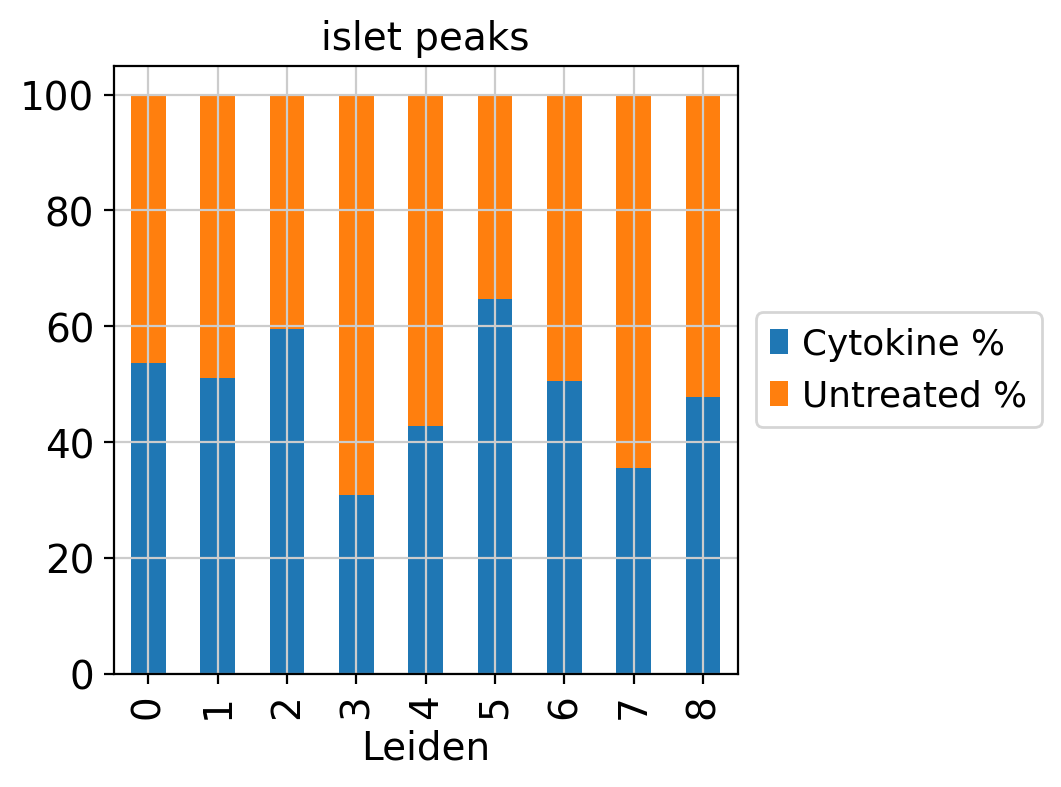

In [33]:
clust = pd.read_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/stat/condition.txt', header = 0, sep = '\t', index_col = 0)
clust = clust.drop(columns = ['Cytokine', 'Untreated'])
clust.plot(kind='bar', stacked=True, title = 'islet peaks')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

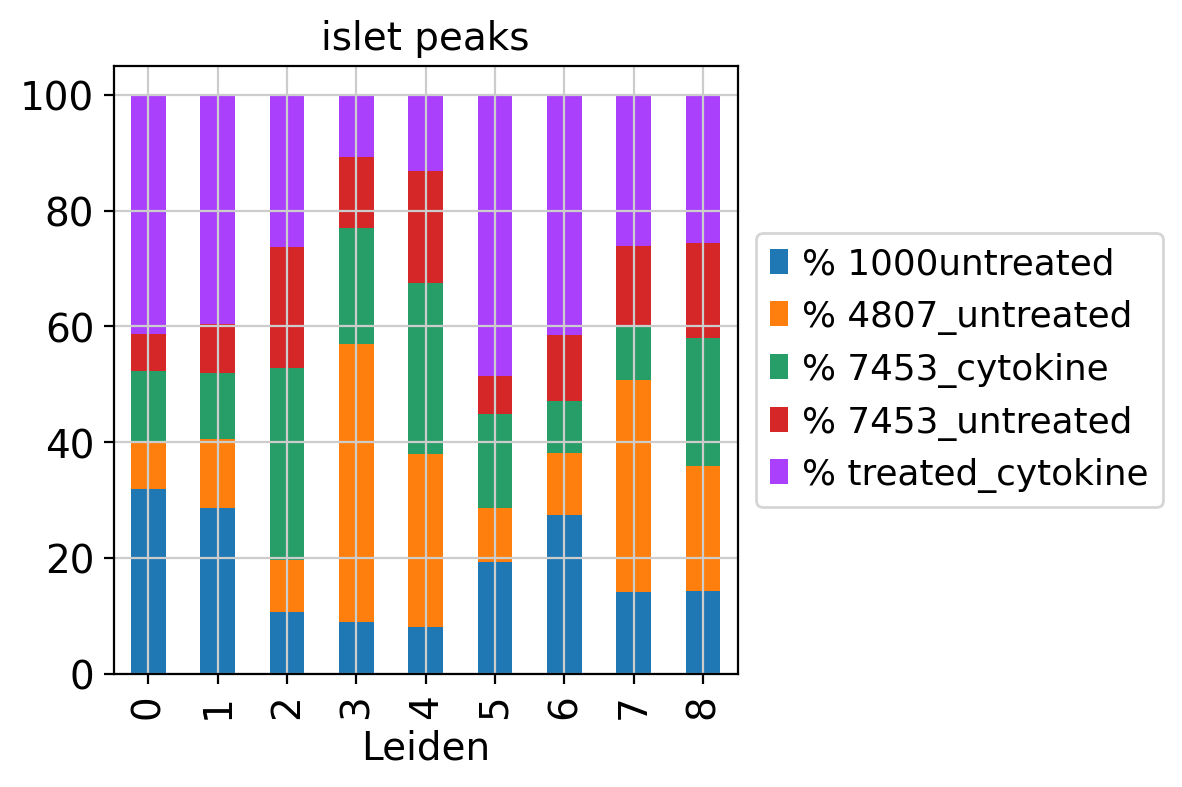

In [144]:
condition = pd.read_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/stats.txt', header = 0, sep = '\t', index_col = 0)
condition = condition.drop(columns = ['1000untreated', '4807_untreated', '7453_cytokine', '7453_untreated', 'treated_cytokine'])
#condition = condition.set_index('Leiden')
condition.plot(kind='bar', stacked=True, title = 'islet peaks')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


# Separate by dataset

In [4]:
final = pd.read_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/islet_biobank_peaks.txt', sep = '\t', index_col = 0)
final

unique_usable_reads  \
scATAC_islet4807_unt_4000_AAACGAACACGACGAA                55794   
scATAC_islet4807_unt_4000_AAACGAACAGGTGGTA                79820   
scATAC_islet4807_unt_4000_AAACGAAGTTTGATCG                 9181   
scATAC_islet4807_unt_4000_AAACTGCGTACATGGG                 9348   
scATAC_islet4807_unt_4000_AAACTGCGTGCAAGAC                 6271   
...                                                         ...   
C0026_TTTGTGTGTGGCCTTG                                     9811   
C0026_TTTGTGTTCAGATACC                                    12284   
C0026_TTTGTGTTCATTCTTG                                    10274   
C0026_TTTGTGTTCCCTATTA                                    14403   
C0026_TTTGTGTTCGATCTTT                                     2804   

                                            total_sequenced_reads  \
scATAC_islet4807_unt_4000_AAACGAACACGACGAA                  96659   
scATAC_islet4807_unt_4000_AAACGAACAGGTGGTA                 166554   
scATAC_islet4807_unt_4000_AAACGAAGTTTGATCG                  27320   
scATAC_islet4807_unt_4000_AAACTGCGTACATGGG                  21914   
scATAC_islet4807_unt_4000_AAACTGCGTGCAAGAC                  12404   
...                                                           ...   
C0026_TTTGTGTGTGGCCTTG                                      11729   
C0026_TTTGTGTTCAGATACC                                      14590   
C0026_TTTGTGTTCATTCTTG                                      12476   
C0026_TTTGTGTTCCCTATTA                                      16710   
C0026_TTTGTGTTCGATCTTT                                       3298   

                                            duplicated_reads  \
scATAC_islet4807_unt_4000_AAACGAACACGACGAA             40396   
scATAC_islet4807_unt_4000_AAACGAACAGGTGGTA             84769   
scATAC_islet4807_unt_4000_AAACGAAGTTTGATCG             16896   
scATAC_islet4807_unt_4000_AAACTGCGTACATGGG             11555   
scATAC_islet4807_unt_4000_AAACTGCGTGCAAGAC              5891   
...                                                      ...   
C0026_TTTGTGTGTGGCCTTG                                  1828   
C0026_TTTGTGTTCAGATACC                                  2028   
C0026_TTTGTGTTCATTCTTG                                  2137   
C0026_TTTGTGTTCCCTATTA                                  2021   
C0026_TTTGTGTTCGATCTTT                                   438   

                                            unique_mito_reads  reads_in_peaks  \
scATAC_islet4807_unt_4000_AAACGAACACGACGAA                 26           27077   
scATAC_islet4807_unt_4000_AAACGAACAGGTGGTA               1111           46876   
scATAC_islet4807_unt_4000_AAACGAAGTTTGATCG               1092            3077   
scATAC_islet4807_unt_4000_AAACTGCGTACATGGG                881            3058   
scATAC_islet4807_unt_4000_AAACTGCGTGCAAGAC                143            2215   
...                                                       ...             ...   
C0026_TTTGTGTGTGGCCTTG                                     42            5803   
C0026_TTTGTGTTCAGATACC                                    146            6027   
C0026_TTTGTGTTCATTCTTG                                     20            5600   
C0026_TTTGTGTTCCCTATTA                                     12            8035   
C0026_TTTGTGTTCGATCTTT                                     18            2078   

                                            reads_in_promoters  tss_used  \
scATAC_islet4807_unt_4000_AAACGAACACGACGAA               10099      4143   
scATAC_islet4807_unt_4000_AAACGAACAGGTGGTA               20344      6447   
scATAC_islet4807_unt_4000_AAACGAAGTTTGATCG                1031       519   
scATAC_islet4807_unt_4000_AAACTGCGTACATGGG                1016       497   
scATAC_islet4807_unt_4000_AAACTGCGTGCAAGAC                 895       427   
...                                                        ...       ...   
C0026_TTTGTGTGTGGCCTTG                                    2527      1208   
C0026_TTTGTGTTCAGATACC                                    36

In [5]:
final = pd.read_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/islet_biobank_peaks.txt', sep = '\t', index_col = 0)
final = final[final['experiment'] != 'C0025']
final = final[final['experiment'] != 'A0019']
final = final[final['experiment'] != 'C0026']
final.to_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/onlyIslets_peaks_jan4.txt', sep='\t')
unt = final[final.index.str.contains("unt")]
cyt = final[final.index.str.contains("cyt")]
unt.to_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/onlyIslets_peaks_jan4.untreated.txt', sep='\t')
cyt.to_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/onlyIslets_peaks_jan4.cytokine.txt', sep='\t')

final

unique_usable_reads  \
scATAC_islet4807_unt_4000_AAACGAACACGACGAA                55794   
scATAC_islet4807_unt_4000_AAACGAACAGGTGGTA                79820   
scATAC_islet4807_unt_4000_AAACGAAGTTTGATCG                 9181   
scATAC_islet4807_unt_4000_AAACTGCGTACATGGG                 9348   
scATAC_islet4807_unt_4000_AAACTGCGTGCAAGAC                 6271   
...                                                         ...   
1000untreated_TTTGTGTAGGAAGACA                            77922   
1000untreated_TTTGTGTAGGAAGGTA                            30098   
1000untreated_TTTGTGTCAAGTGGCA                            32805   
1000untreated_TTTGTGTGTGGATTCT                            32757   
1000untreated_TTTGTGTGTGTCTACA                            51267   

                                            total_sequenced_reads  \
scATAC_islet4807_unt_4000_AAACGAACACGACGAA                  96659   
scATAC_islet4807_unt_4000_AAACGAACAGGTGGTA                 166554   
scATAC_islet4807_unt_4000_AAACGAAGTTTGATCG                  27320   
scATAC_islet4807_unt_4000_AAACTGCGTACATGGG                  21914   
scATAC_islet4807_unt_4000_AAACTGCGTGCAAGAC                  12404   
...                                                           ...   
1000untreated_TTTGTGTAGGAAGACA                             122955   
1000untreated_TTTGTGTAGGAAGGTA                              52755   
1000untreated_TTTGTGTCAAGTGGCA                              50800   
1000untreated_TTTGTGTGTGGATTCT                              52571   
1000untreated_TTTGTGTGTGTCTACA                              96270   

                                            duplicated_reads  \
scATAC_islet4807_unt_4000_AAACGAACACGACGAA             40396   
scATAC_islet4807_unt_4000_AAACGAACAGGTGGTA             84769   
scATAC_islet4807_unt_4000_AAACGAAGTTTGATCG             16896   
scATAC_islet4807_unt_4000_AAACTGCGTACATGGG             11555   
scATAC_islet4807_unt_4000_AAACTGCGTGCAAGAC              5891   
...                                                      ...   
1000untreated_TTTGTGTAGGAAGACA                         44539   
1000untreated_TTTGTGTAGGAAGGTA                         21014   
1000untreated_TTTGTGTCAAGTGGCA                         17810   
1000untreated_TTTGTGTGTGGATTCT                         19587   
1000untreated_TTTGTGTGTGTCTACA                         43160   

                                            unique_mito_reads  reads_in_peaks  \
scATAC_islet4807_unt_4000_AAACGAACACGACGAA                 26           27077   
scATAC_islet4807_unt_4000_AAACGAACAGGTGGTA               1111           46876   
scATAC_islet4807_unt_4000_AAACGAAGTTTGATCG               1092            3077   
scATAC_islet4807_unt_4000_AAACTGCGTACATGGG                881            3058   
scATAC_islet4807_unt_4000_AAACTGCGTGCAAGAC                143            2215   
...                                                       ...             ...   
1000untreated_TTTGTGTAGGAAGACA                            125           35601   
1000untreated_TTTGTGTAGGAAGGTA                           1488           20119   
1000untreated_TTTGTGTCAAGTGGCA                             58           16240   
1000untreated_TTTGTGTGTGGATTCT                             54           22367   
1000untreated_TTTGTGTGTGTCTACA                           1633           33989   

                                            reads_in_promoters  tss_used  \
scATAC_islet4807_unt_4000_AAACGAACACGACGAA               10099      4143   
scATAC_islet4807_unt_4000_AAACGAACAGGTGGTA               20344      6447   
scATAC_islet4807_unt_4000_AAACGAAGTTTGATCG                1031       519   
scATAC_islet4807_unt_4000_AAACTGCGTACATGGG                1016       497   
scATAC_islet4807_unt_4000_AAACTGCGTGCAAGAC                 895       427   
...                                                        ...       ...   
1000untreated_TTTGTGTAGGAAGACA                           14582      4772   
1000untreated_TTTGTGTAGGAAGGTA                            86

In [6]:
final.to_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/onlyIslets_peaks_jan4.txt', sep='\t')


In [7]:
#cluster = pd.read_csv('/home/ebeebe/combined_islet.txt', sep = '\t')
unt = final[final.index.str.contains("unt")]
cyt = final[final.index.str.contains("cyt")]
#tgn = adata_norm[adata_norm3.obs.index.str.contains("1000tgn_")]
#cyt = cluster[cluster['index'].str.contains("treated_cyt")]


In [8]:
len(cyt)

3882

In [9]:
len(unt)

3947

In [10]:
unt.to_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/onlyIslets_peaks_jan4.untreated.txt', sep='\t')

cyt.to_csv('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/onlyIslets_peaks_jan4.cytokine.txt', sep='\t')


In [2]:
adata_norm = sc.read_h5ad('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/original_merge_1112.h5ad')


In [13]:
adata_norm.obsp

PairwiseArrays with keys: 

## Recluster beta and alpha

In [2]:
adata_save = sc.read_h5ad('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/islet_biobank_peaks.h5ad')

In [7]:
demux = pd.read_csv("/nfs/lab/projects/islet_cytok/analysis/snATAC/barcode_and_cluster_demux.tsv", sep="\t")

In [20]:
adata_save.obs.to_csv("/nfs/lab/projects/islet_cytok/analysis/snATAC/barcode_and_cluster_original.tsv", sep="\t")

In [3]:
metadata = adata_save.obs

In [8]:
%%R -i demux,metadata -o replaceDonor,replaceSample,replaceTreat,replaceCelltype
metadata$samp = as.character(metadata$experiment)
metadata$treatment = "unt"
metadata$donor = as.character(metadata$experiment)
metadata$cluster = "none"
namevec =  demux$X
metadata[match( namevec, rownames(metadata) ),'samp'] = as.character(demux$samples)
metadata[match( namevec, rownames(metadata) ),'treatment'] = as.character(demux$treat)
metadata[match( namevec, rownames(metadata) ),'donor'] = as.character(demux$donor)
metadata[match( namevec, rownames(metadata) ),'cluster'] = as.character(demux$cluster)
replaceDonor  = metadata$donor
replaceSample = metadata$samp
replaceTreat  = metadata$treatment
replaceCelltype  = metadata$cluster

In [9]:
adata_save.obs['donor']     = replaceDonor
adata_save.obs['samp']      = replaceSample
adata_save.obs['treatment'] = replaceTreat
adata_save.obs['celltype'] = replaceCelltype

In [24]:
metadata2 = metadata.copy()

In [25]:
metadata2 = metadata2[metadata2['experiment'] != 'C0025']
metadata2 = metadata2[metadata2['experiment'] != 'A0019']
metadata2 = metadata2[metadata2['experiment'] != 'C0026']

In [26]:
metadata2 = metadata2[metadata2['celltype'] == 'beta']

In [27]:
#metadata2 = metadata2[metadata2['celltype'] == 'alpha']

In [28]:
pd.crosstab(metadata2['leiden'],metadata2['celltype'])

celltype  beta
leiden        
0         1903
2          641
3         1155
5          568

In [29]:
keep = metadata2.index

In [30]:
adata = adata_save[(adata_save.obs.index.isin(keep)),:].copy()

In [31]:
adata_norm = adata.copy()

In [32]:
#HARMONIZE  WITH DONOR
#update data_mat with pc var
pc = pd.DataFrame(adata_norm.obsm['X_pca'], columns=['PC{}'.format(i) for i in range(1,51)], index=adata_norm.obs.index)
meta_data = adata_norm.obs.reset_index()
vars_use = ['experiment']
ho = hm.run_harmony(pc, meta_data, vars_use)
res = pd.DataFrame(ho.Z_corr)
res.columns = ['X{}'.format(i + 1) for i in range(res.shape[1])]
t_res = res.transpose()
adata_norm.obsm['X_pca'] = t_res.to_numpy()


2022-07-28 13:15:31,841 - harmonypy - INFO - Iteration 1 of 10
2022-07-28 13:15:33,152 - harmonypy - INFO - Iteration 2 of 10
2022-07-28 13:15:34,416 - harmonypy - INFO - Iteration 3 of 10
2022-07-28 13:15:35,713 - harmonypy - INFO - Iteration 4 of 10
2022-07-28 13:15:36,602 - harmonypy - INFO - Iteration 5 of 10
2022-07-28 13:15:37,287 - harmonypy - INFO - Converged after 5 iterations


computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
running Leiden clustering
    finished: found 2 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'donor' as categorical
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'samp' as categorical
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a 

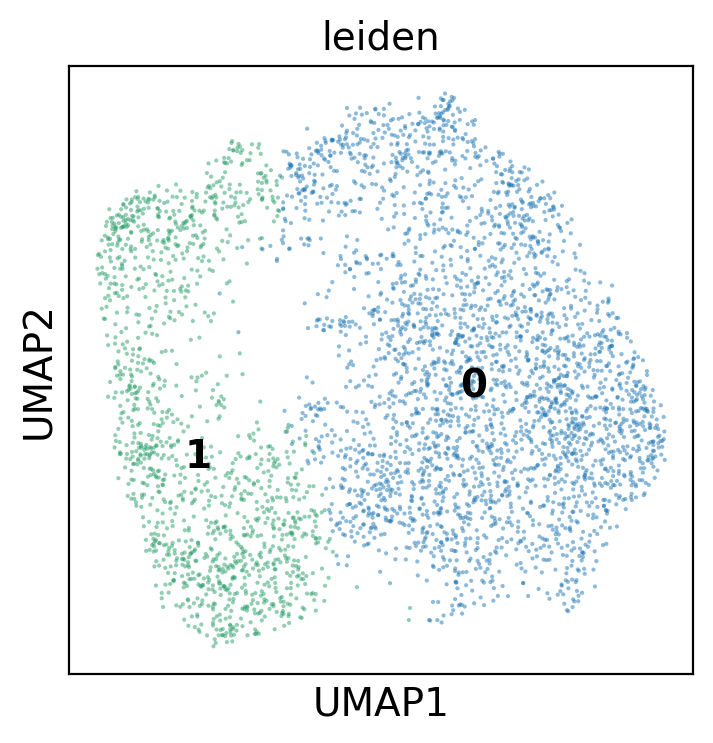

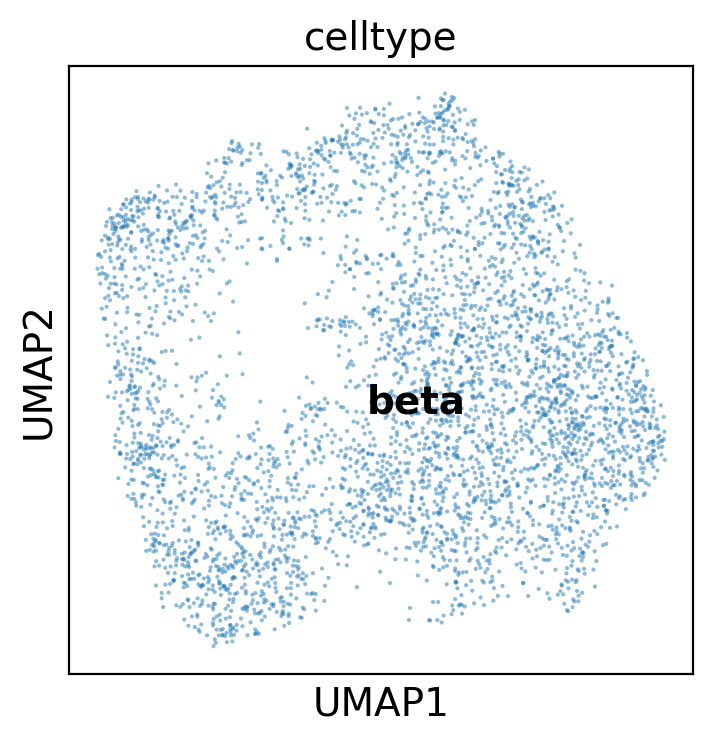

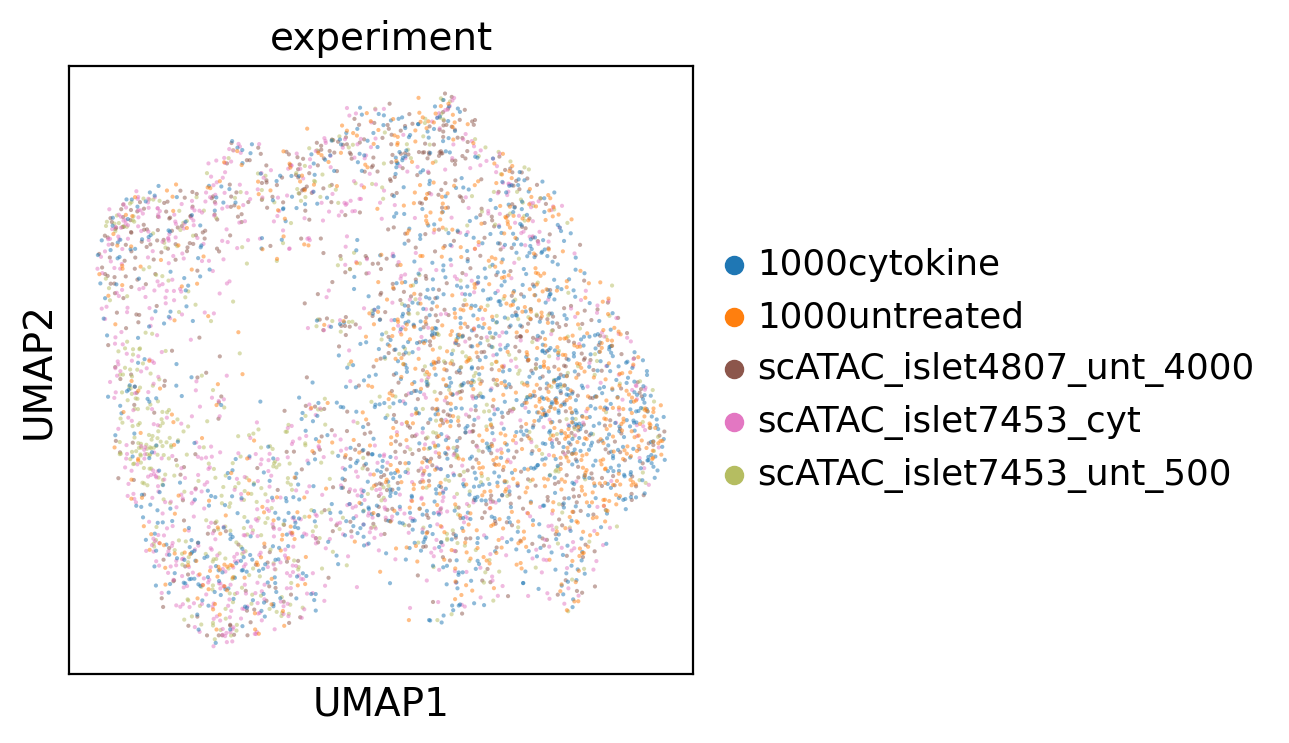

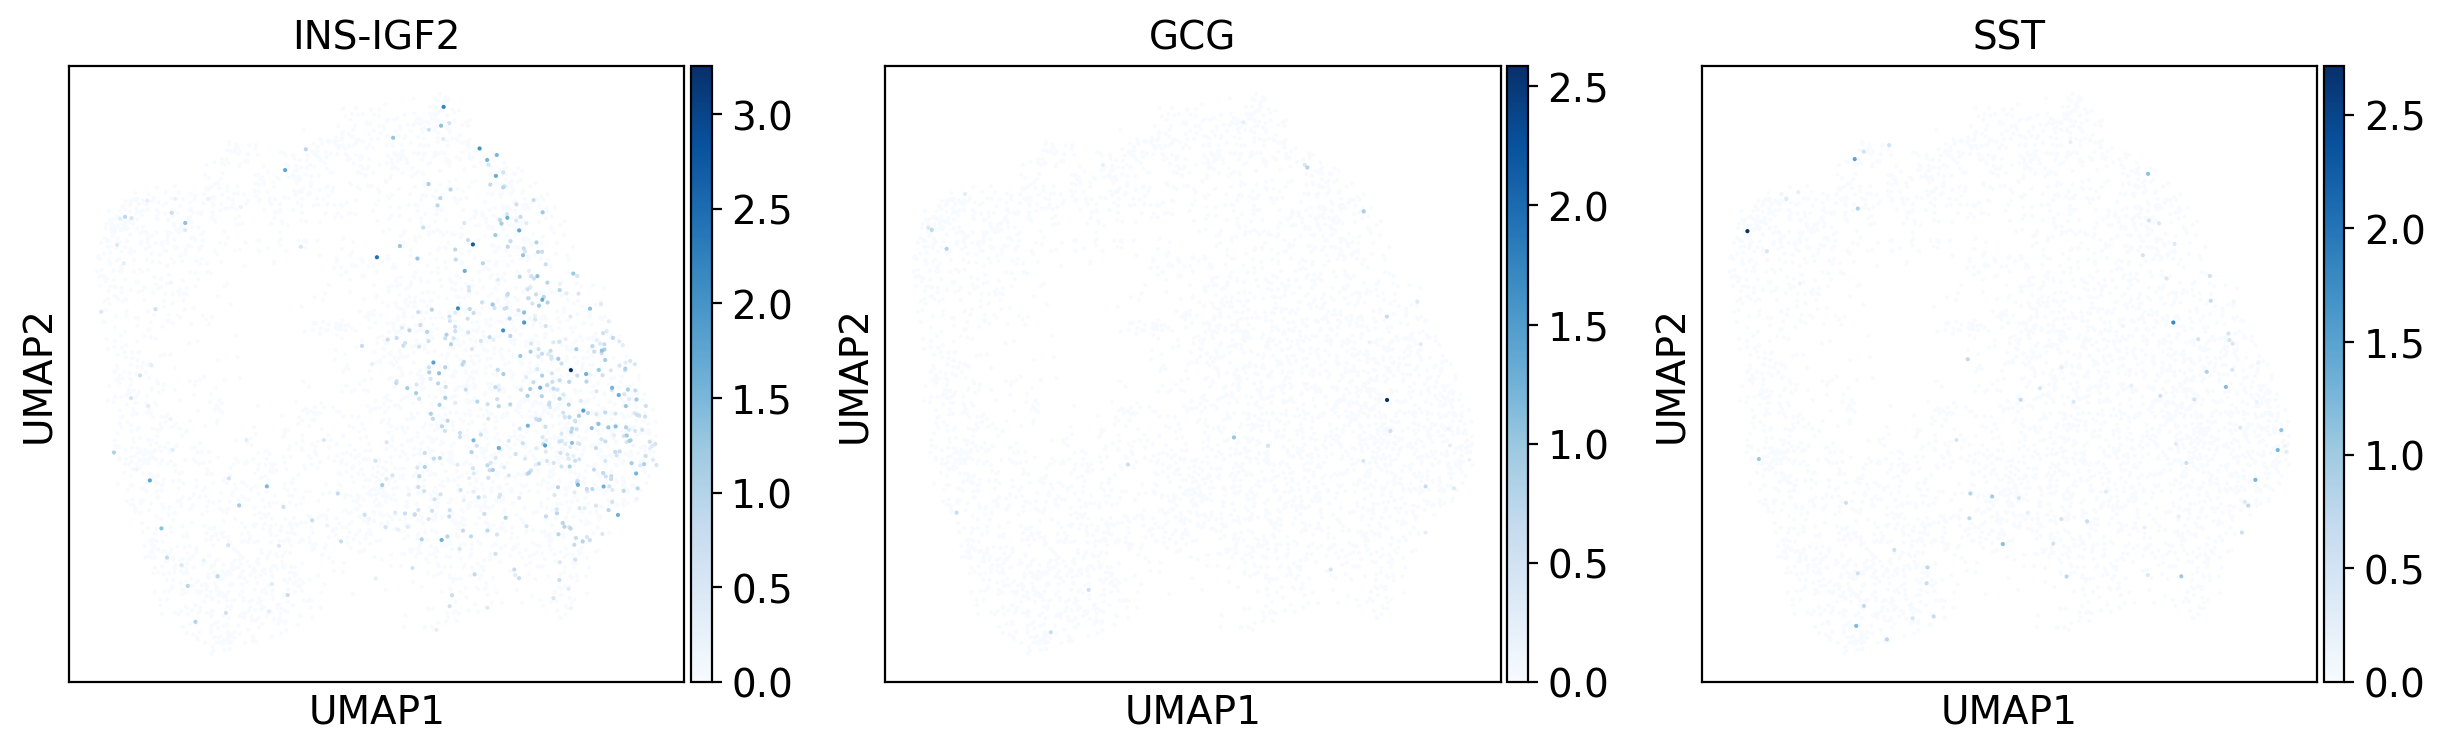

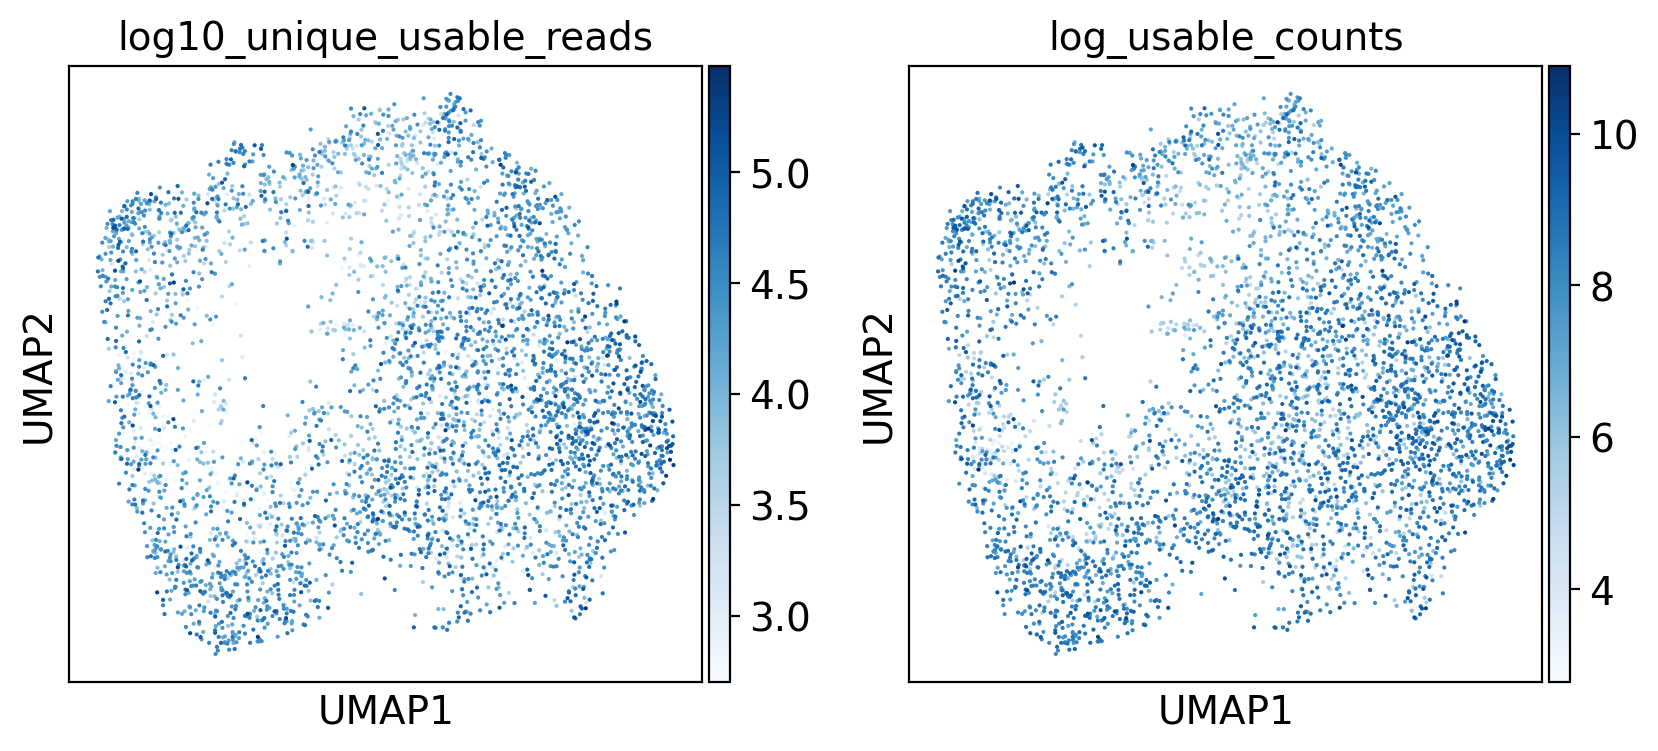

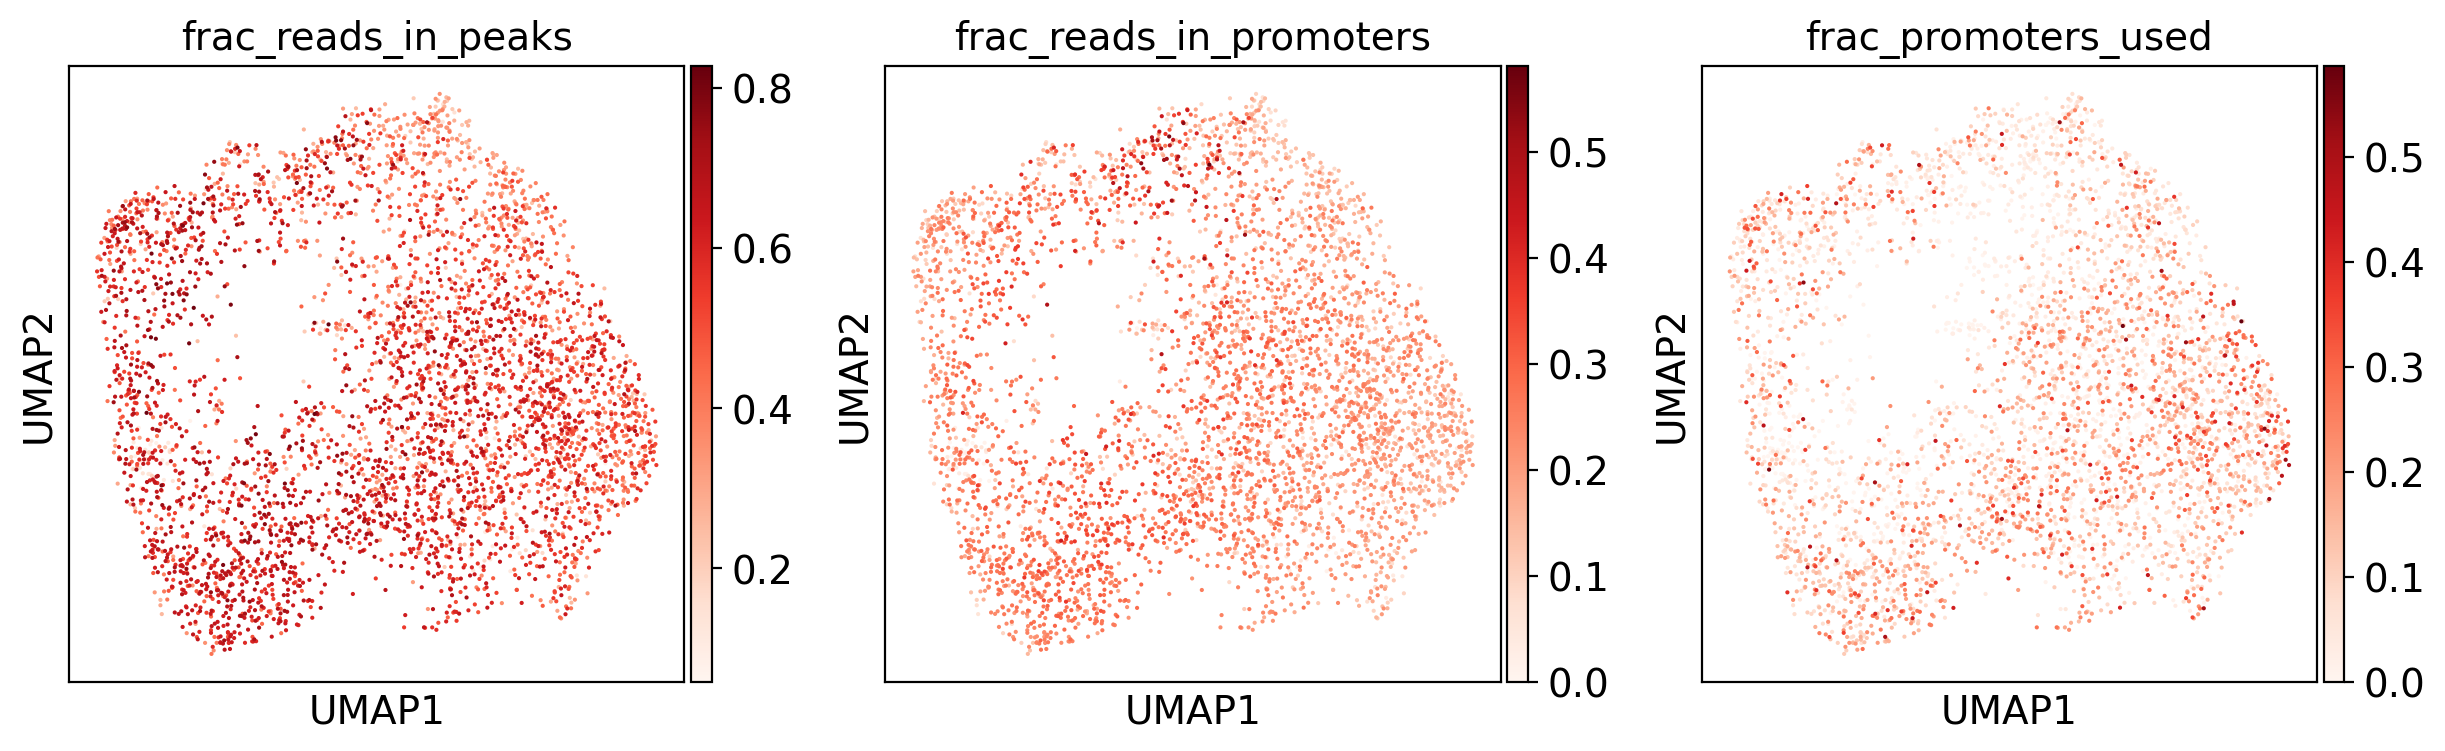

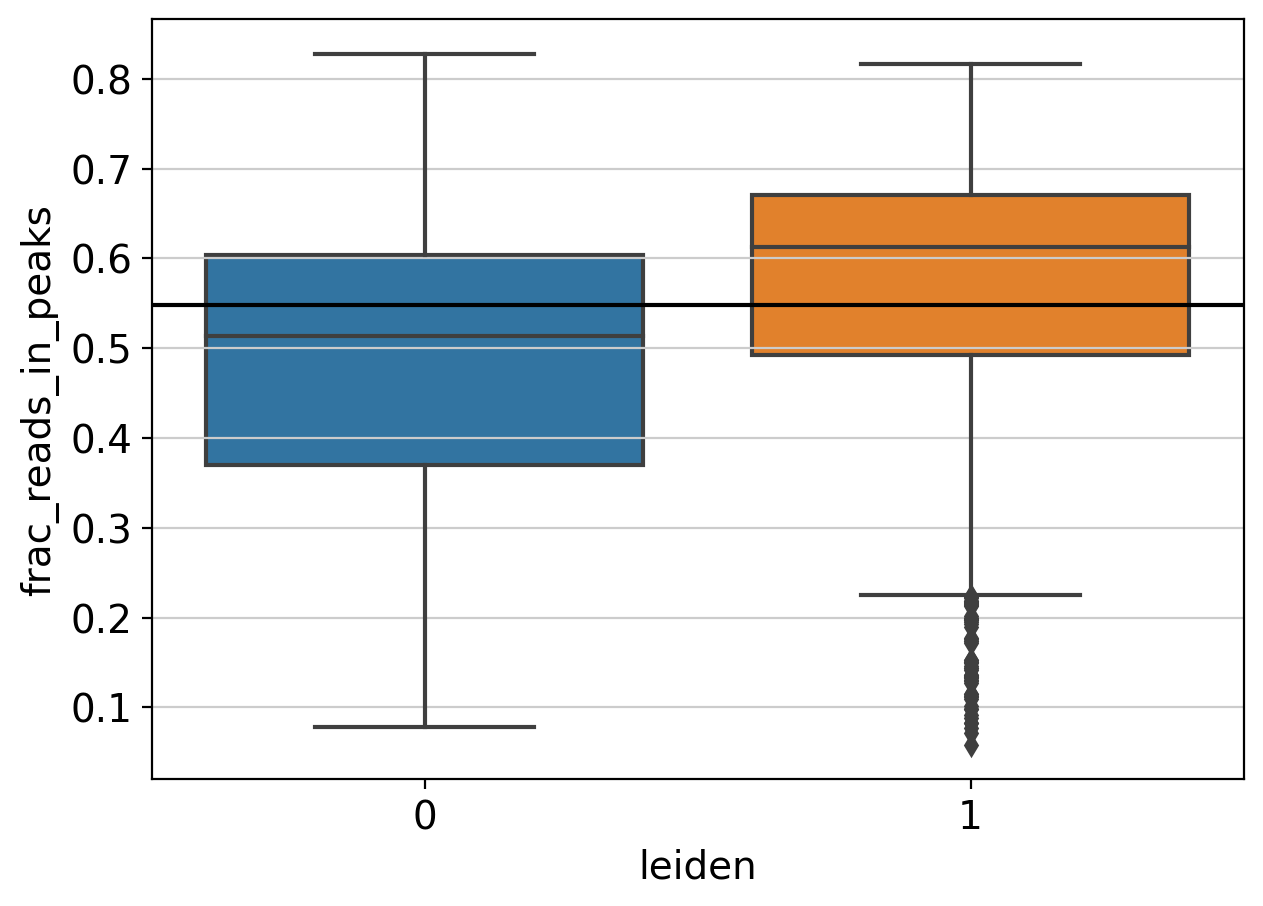

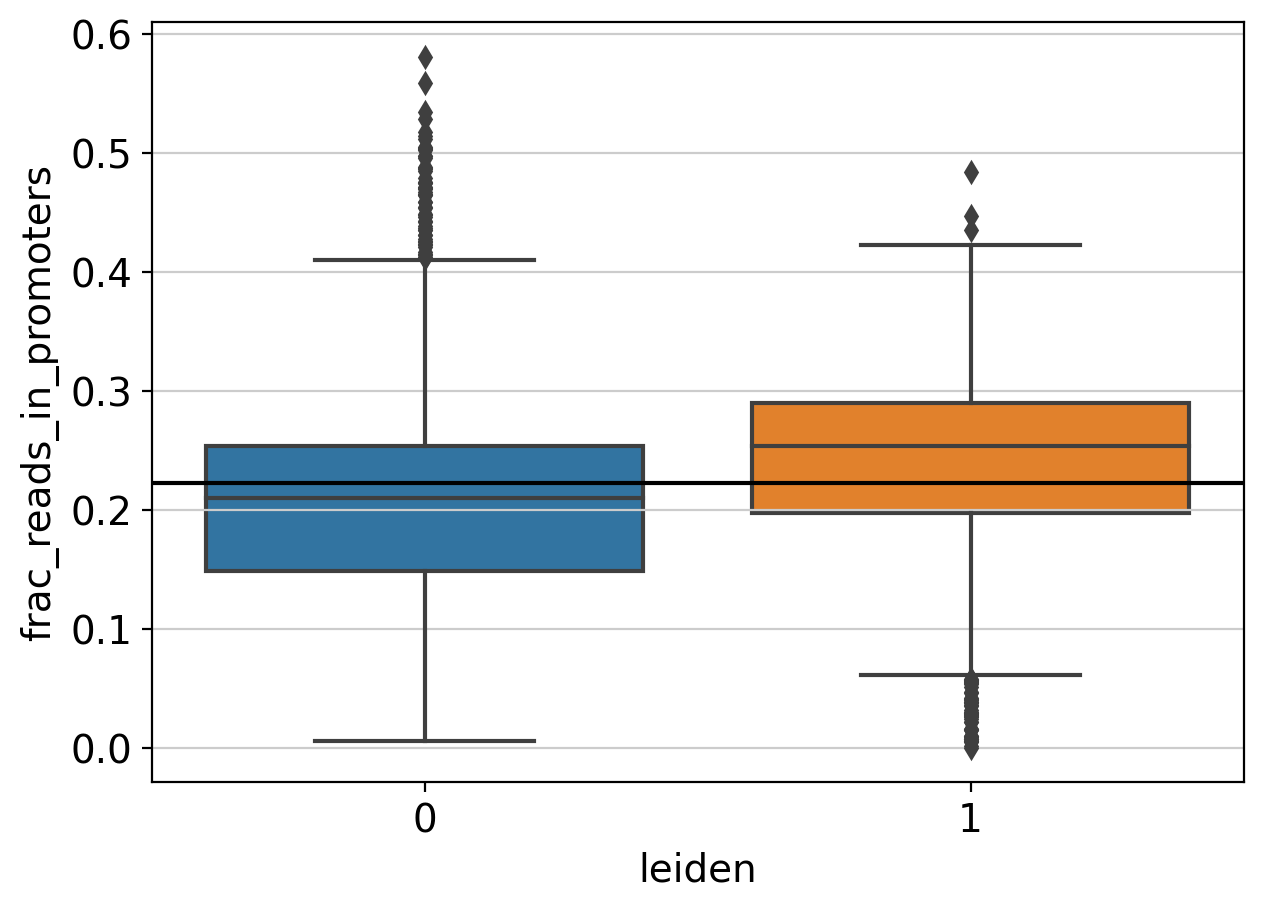

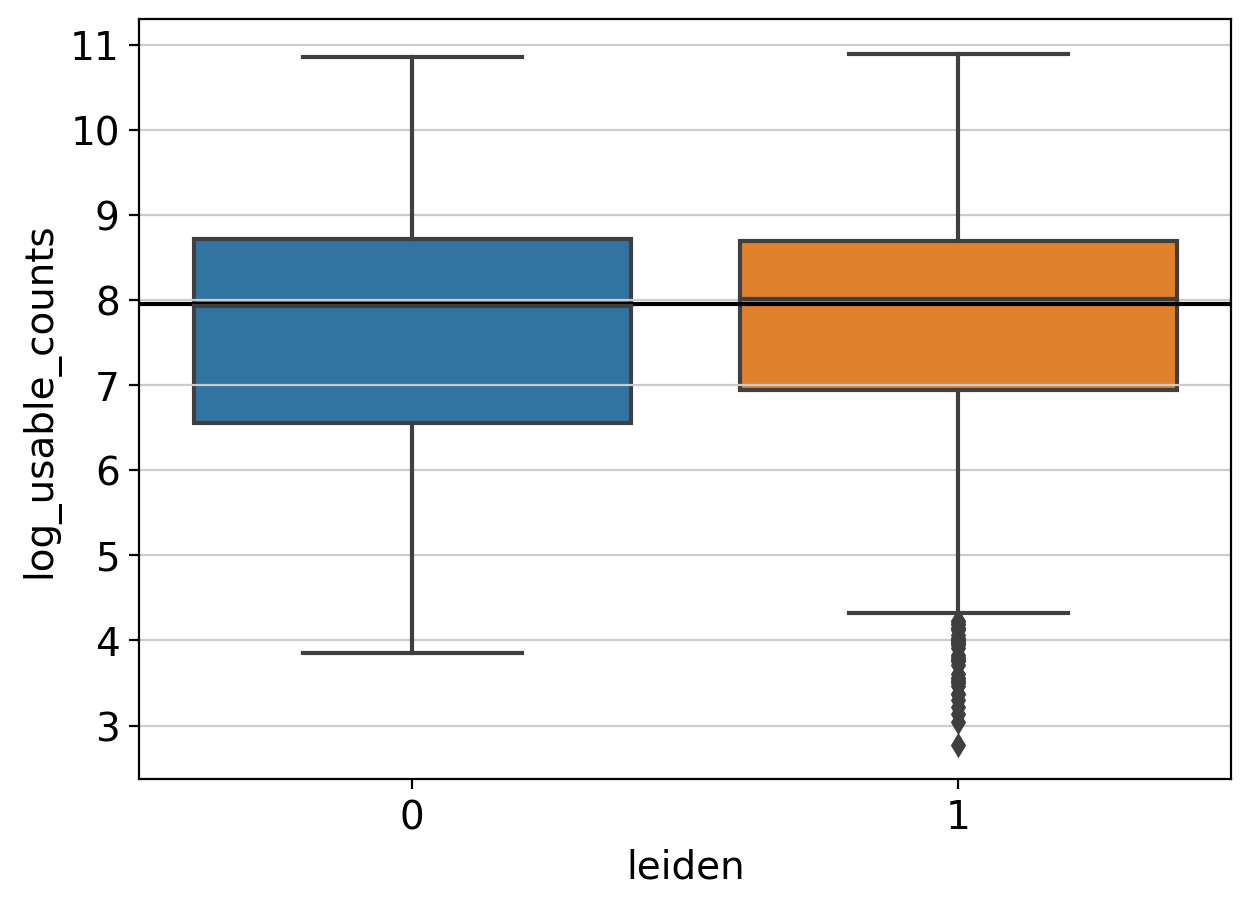

In [33]:
#seed = 10
#np.random.seed(seed)
#adata_norm.obsm['X_pca'] = harmonized.values
sc.pp.neighbors(adata_norm, n_neighbors=30, method='umap', metric='cosine', random_state=0, n_pcs=50)
sc.tl.leiden(adata_norm, resolution=0.1, random_state=0)
sc.tl.umap(adata_norm, min_dist=0.3, random_state=0)

sc.settings.set_figure_params(dpi=100)
sc.pl.umap(adata_norm, color=['leiden'], size=9, alpha=.5, legend_loc='on data')
sc.pl.umap(adata_norm, color=['celltype'], size=9, alpha=.5, legend_loc='on data')

sc.pl.umap(adata_norm, color=['experiment'], size=9, alpha=.5)
#sc.pl.umap(adata_norm, color=['condition'], size=9, alpha=.5)

sc.pl.umap(adata_norm, color=['INS-IGF2','GCG','SST'], size=9, color_map='Blues', frameon=True, use_raw=True)
#sc.pl.umap(adata_norm, color=['ARX','CD69'], size=9, color_map='Blues', frameon=True, use_raw=True)
#sc.pl.umap(adata_norm, color=['REG1A','PDX1','CDH5'], size=9, color_map='Blues', frameon=True, use_raw=True)
#sc.pl.umap(adata_norm, color=['CFTR','PDGFRB'], size=9, color_map='Blues', frameon=True, use_raw=True)

sc.pl.umap(adata_norm, color=['log10_unique_usable_reads','log_usable_counts'], size=9, color_map='Blues')

sc.pl.umap(adata_norm, color=['frac_reads_in_peaks','frac_reads_in_promoters','frac_promoters_used'], cmap='Reds', size=9, legend_loc='on data')

for metric in ['frac_reads_in_peaks','frac_reads_in_promoters','log_usable_counts']:
    fig, ax1 = plt.subplots(1,1,figsize=(7,5))
    sns.boxplot(x='leiden', y=metric, data=adata_norm.obs, ax=ax1)
    ax1.axhline(adata_norm.obs[metric].median(), color='black')
    plt.show()


In [111]:
adata_norm.obs.to_csv("/nfs/lab/projects/islet_cytok/analysis/snATAC/newclusters_only_proj_donor_beta.txt", sep="\t")

In [112]:
sc.tl.rank_genes_groups(adata_norm, 'leiden', method='wilcoxon' , corr_method= 'benjamini-hochberg')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:46)


In [113]:
pd.DataFrame(adata_norm.uns['rank_genes_groups']['names']).to_csv("/nfs/lab/projects/islet_cytok/analysis/snATAC/clusters_rank_genes_names_beta.txt", sep="\t")
pd.DataFrame(adata_norm.uns['rank_genes_groups']['pvals_adj']).to_csv("/nfs/lab/projects/islet_cytok/analysis/snATAC/clusters_rank_genes_pvals_adj_beta.txt", sep="\t")
pd.DataFrame(adata_norm.uns['rank_genes_groups']['logfoldchanges']).to_csv("/nfs/lab/projects/islet_cytok/analysis/snATAC/clusters_rank_genes_logfoldchanges_beta.txt", sep="\t")
pd.DataFrame(adata_norm.uns['rank_genes_groups']['pvals']).to_csv("/nfs/lab/projects/islet_cytok/analysis/snATAC/clusters_rank_genes_pvals_beta.txt", sep="\t")


In [134]:
pd.DataFrame(adata_norm.obsm['X_umap'], index=adata_norm.obs.index, columns=['UMAP1','UMAP2']).to_csv('/nfs/lab/projects/islet_cytok/analysis/snATAC/newclusters_only_proj_donor_alpha_UMAP.txt', sep="\t")